#### **References:** 

- Asya Pisarevskaya, Nathan Levy, Peter Scholten, Joost Jansen, Mapping migration studies: An empirical analysis of the coming of age of a research field, Migration Studies, Volume 8, Issue 3, September 2020, Pages 455–481, https://doi.org/10.1093/migration/mnz031. https://academic.oup.com/migration/article/8/3/455/5543467


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
plt.rcParams.update({'font.size': 16})

In [2]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - values.min()) / (values.max() - values.min())
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype("int")
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

palette="Spectral"#,"magma"

In [3]:
data_en=pd.read_excel("filtrando_criterios_LDA_en.xlsx",engine="openpyxl")
data_es=pd.read_excel("filtrando_criterios_LDA_es.xlsx",engine="openpyxl")

In [4]:
#basemaestra=pd.read_excel("scrapping/data_cleaned/articulos_base_maestra/Base_datos_maestra_23112021_ver3_solo_descargados.xlsx",engine="openpyxl")

In [5]:
#basemaestra=basemaestra[["Archivo2","Año"]]
#basemaestra=basemaestra.rename(columns={"Archivo2": "Documento"})

In [6]:
data_en2=data_en#pd.merge(data_en,basemaestra,on="Documento")
data_es2=data_es#pd.merge(data_es,basemaestra,on="Documento")

In [7]:
# Criterios en Ingles:
e1=["gender","marriage","female","family","parent","youth"] #Gender and family
e2=["antigua y barbuda","argentina","bahamas","barbados","belice",
        "bolivia","brasil","chile","colombia","costa rica","cuba",
        "dominica","ecuador","el salvador","granada","guatemala",
        "guyana","haiti","honduras","jamaica","mexico","nicaragua",
        "panama","paraguay","peru","dominicana","suriname","trinidad y tobago",
        "uruguay","venezuela","united states","canada","spain"] #LatinAmerican migration
e3=["law","right","human","protection"] #Human rights law and protection
e4=["policy","state","national","integration","government","governance"] #Governance of migration-related diversity
e5=["political","organization","movement","community","social"] #Political participation and mobilisation of migrants
e6=["border","control","state","security","legal"] #Border management and trafficking
e7=["health","risk","age","mortality","care","service","mental","access","hiv","sexual","behavior",
"food","treatment","patient","cancer","intervention","disorder","fertility","births",
"deaths","covid"] #Heath risks and migration, services to migrants
e8=["integration","society","social","acculturation","language","teacher","school","education","student",
"university"] #Immigrant integration, Education and language training
e9=["return","home","decision","displacement"] #Migration decision making and return
e10=["violence","armed","weapon","war","event","conflict","diaspora"] #Conflicts, violence and migration
e11=["refugee","asylum","seeker","camp","resettlement"] #Settlement of asylum seekers and refugees
e12=["projections","regression","descriptive","logistic","statistic","factorial",
"univariate","multivariate"] #Qualitative thecnique research methods
e13=["experience","interview","participant","qualitative","quantitative","focus","survey","census",
"information","source","discourse","narrative","smarthphone","phone","facebook","twitter","mobile",
"satellite","satelital","cell phone","case studies","dtm","displacement tracking matrix","lamp",
"imila","social networks"] #Qualitative soruce research methods
e14=["religious","religion","indigenous","discrimination","xenophobia","ethnic","cultural",
"minority","ethnicity","intercultural","culture","racial",
"race","black","white","racism"] #Comunities diversity
e15=["housing","accommodation","poverty","security","work","exploitation","abuse"] #Tematics migrant associated
e16=["worker","labour","market","work","labor"] #Labour migration 
e17=["remittance","household","economic","income","development"] #Migration, remittances and development 
e=e1+e2+e3+e4+e5+e6+e7+e8+e9+e10+e11+e12+e13+e14+e15+e16+e17

In [8]:
# Criterios en Español:
s1=["gnero","matrimonio","mujer","familia","padres","jvenes"] #Gender and family
s2=["antigua y barbuda","argentina","bahamas","barbados","belice",
        "bolivia","brasil","chile","colombia","costa rica","cuba",
        "dominica","ecuador","el salvador","granada","guatemala",
        "guyana","haiti","honduras","jamaica","mexico","nicaragua",
        "panam","paraguay","peru","dominicana","suriname","trinidad y tobago",
        "uruguay","venezuela","estados unidos","canad","espaa"] #LatinAmerican migration
s3=["ley","derecho","human","proteccin"] #Human rights law and protection
s4=["policia","estado","nacional","integracin","gobierno","gobernanza"] #Governance of migration-related diversity
s5=["poltica","organizacin","mobilidad","communidad","social"] #Political participation and mobilisation of migrants
s6=["frontera","control","estado","seguridad","legal"] #Border management and trafficking
s7=["salud","riesgo","edad","mortalidad","cuidado","servicio","mental","acceso","vih","sexual","comportamiento",
"alimentacin","tratamiento","paciente","cancer","intervencin","desorden","fertilidad","nacimiento",
"muerte","covid"] #Heath risks and migration, services to migrants
s8=["integracin","sociedad","social","aculturacin","lenguaje","profesor","escuela","educacin","estudiante",
"universidad"] #Immigrant integration, Education and language training
s9=["retorno","hogar","decisin","desplazamiento"] #Migration decision making and return
s10=["violencia","armado","arma","guerra","evento","conflicto","dispora"] #Conflicts, violence and migration
s11=["refugio","asilo","buscador","campamento","reasentamiento"] #Settlement of asylum seekers and refugees
s12=["proyecciones","regresin","descriptiv","logstic","estadstic","factorial",
"univariad","multivariad"] #Qualitative thecnique research methods
s13=["experiencia","entrevista","participant","cualitativ","cuantitativ","focal","encuesta","censo",
"informacin","fuente","discurso","narrativa","smarthphone","telfono","facebook","twitter","mbil",
"satlite","satelital","celular","caso de estudio","casos de estudio","dtm","displacement tracking matrix",
"matriz de seguimiento de","lamp","imila","red social","redes sociales"] #Qualitative soruce research methods
s14=["religios","religin","indgena","discriminacin","xenofobia","etnic","cultural",
"minoritari","minoras","etnicidad","intercultural","cultura","racial",
"raza","negro","blanco","racismo"] #Comunities diversity
s15=["vivienda","alojamiento","pobreza","seguridad","trabajo","explotacin","abuso"] #Tematics migrant associated
s16=["trabajador","labor","mercado","trabajo","mano de obra"] #Labour migration 
s17=["remesas","hogares","economa","ingresos","desarrollo"] #Migration, remittances and development 
s=s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12+s13+s14+s15+s16+s17

In [9]:
for i,j in zip([e1,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17],[s1,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17]):
    print(len(i),len(j),len(i)-len(j))

6 6 0
4 4 0
6 6 0
5 5 0
5 5 0
21 21 0
10 10 0
4 4 0
7 7 0
5 5 0
8 8 0
26 29 -3
16 17 -1
7 7 0
5 5 0
5 5 0


- e14 y s14, en s14 juntar "minoritari" y "minoras" en uno solo
- e13 y s13, en s13 juntar "red social" y "redes sociales" en uno solo. Tambien juntar en s13 "dtm", "displacement tracking matrix" y "matriz de seguimiento de" y en e13 "dtm" y "displacement tracking matrix" en uno solo. También en s13 juntar "caso de estudio" y "casos de estudio" en uno solo.

In [10]:
data_en2["dtm2"]=data_en2["dtm"]+data_en2["displacement tracking matrix"]
data_es2["dtm2"]=data_es2["matriz de seguimiento de"]+data_es2["dtm"]+data_es2["displacement tracking matrix"]
data_es2["caso de estudio 2"]=data_es2["caso de estudio"]+data_es2["casos de estudio"]
data_es2["minoritari2"]=data_es2["minoritari"]+data_es2["minoras"]
data_es2["red social 2"]=data_es2["red social"]+data_es2["redes sociales"]

In [11]:
del data_es2["red social"]
del data_es2["redes sociales"]
del data_es2["minoritari"]
del data_es2["minoras"]
del data_es2["caso de estudio"]
del data_es2["casos de estudio"]
del data_es2["matriz de seguimiento de"]
del data_es2["dtm"]
del data_es2["displacement tracking matrix"]
del data_en2["dtm"]
del data_en2["displacement tracking matrix"]

In [12]:
es_c=e

In [13]:
cols_es={'gnero': 'gender', 'matrimonio': 'marriage', 'mujer': 'female', 'familia': 'family', 'padres': 'parent', 'jvenes': 'youth', 
      'antigua y barbuda': 'antigua y barbuda', 'argentina': 'argentina', 'bahamas': 'bahamas', 'barbados': 'barbados', 'belice': 'belice', 'bolivia': 'bolivia', 'brasil': 'brasil', 
      'chile': 'chile', 'colombia': 'colombia', 'costa rica': 'costa rica', 'cuba': 'cuba', 'dominica': 'dominica', 'ecuador': 'ecuador', 'el salvador': 'el salvador', 
      'granada': 'granada', 'guatemala': 'guatemala', 'guyana': 'guyana', 'haiti': 'haiti', 'honduras': 'honduras', 'jamaica': 'jamaica', 'mexico': 'mexico', 'nicaragua': 'nicaragua', 
      'panam': 'panama', 'paraguay': 'paraguay', 'peru': 'peru', 'dominicana': 'dominicana', 'suriname': 'suriname', 'trinidad y tobago': 'trinidad y tobago', 'uruguay': 'uruguay', 
      'venezuela': 'venezuela', 'estados unidos': 'united states', 'canad': 'canada', 'espaa': 'spain', 'ley': 'law', 'derecho': 'right', 'human': 'human', 'proteccin': 'protection', 
      'policia': 'policy', 'estado': 'state', 'nacional': 'national', 'integracin': 'integration', 'gobierno': 'government', 'gobernanza': 'governance', 'poltica': 'political', 
      'organizacin': 'organization', 'mobilidad': 'movement', 'communidad': 'community', 'social': 'social', 'frontera': 'border', 'control': 'control', 'estado': 'state', 
      'seguridad': 'security', 'legal': 'legal', 'salud': 'health', 'riesgo': 'risk', 'edad': 'age', 'mortalidad': 'mortality', 'cuidado': 'care', 'servicio': 'service', 'mental': 'mental', 
      'acceso': 'access', 'vih': 'hiv', 'sexual': 'sexual', 'comportamiento': 'behavior', 'alimentacin': 'food', 'tratamiento': 'treatment', 'paciente': 'patient', 'cancer': 'cancer', 
      'intervencin': 'intervention', 'desorden': 'disorder', 'fertilidad': 'fertility', 'nacimiento': 'births', 'muerte': 'deaths', 'covid': 'covid', 'integracin': 'integration', 
      'sociedad': 'society', 'social': 'social', 'aculturacin': 'acculturation', 'lenguaje': 'language', 'profesor': 'teacher', 'escuela': 'school', 'educacin': 'education', 
      'estudiante': 'student', 'universidad': 'university', 'retorno': 'return', 'hogar': 'home', 'decisin': 'decision', 'desplazamiento': 'displacement', 'violencia': 'violence', 
      'armado': 'armed', 'arma': 'weapon', 'guerra': 'war', 'evento': 'event', 'conflicto': 'conflict', 'dispora': 'diaspora', 'refugio': 'refugee', 'asilo': 'asylum', 'buscador': 'seeker', 
      'campamento': 'camp', 'reasentamiento': 'resettlement', 'proyecciones': 'projections', 'regresin': 'regression', 'descriptiv': 'descriptive', 'logstic': 'logistic', 
      'estadstic': 'statistic', 'factorial': 'factorial', 'univariad': 'univariate', 'multivariad': 'multivariate', 'experiencia': 'experience', 'entrevista': 'interview', 
      'participant': 'participant', 'cualitativ': 'qualitative', 'cuantitativ': 'quantitative', 'focal': 'focus', 'encuesta': 'survey', 'censo': 'census', 
      'informacin': 'information', 'fuente': 'source', 'discurso': 'discourse', 'narrativa': 'narrative', 'smarthphone': 'smarthphone', 'telfono': 'phone', 'facebook': 'facebook', 
      'twitter': 'twitter', 'mbil': 'mobile', 'satlite': 'satellite', 'satelital': 'satelital', 'celular': 'cell phone', "dtm2": "dtm", "caso de estudio 2": "case studies",
      'lamp': 'lamp', 'imila': 'imila', 'red social 2': 'social networks', 'religios': 'religious', 'religin': 'religion', 'indgena': 'indigenous', 'discriminacin': 'discrimination', 
      'xenofobia': 'xenophobia', 'etnic': 'ethnic', 'cultural': 'cultural', 'minoritari2': 'minority', 'etnicidad': 'ethnicity', 'intercultural': 'intercultural', 'cultura': 'culture', 
      'racial': 'racial', 'raza': 'race', 'negro': 'black', 'blanco': 'white', 'racismo': 'racism', 'vivienda': 'housing', 'alojamiento': 'accommodation', 'pobreza': 'poverty', 
      'seguridad': 'security', 'trabajo': 'work', 'explotacin': 'exploitation', 'abuso': 'abuse', 'trabajador': 'worker', 'labor': 'labour', 'mercado': 'market', 'trabajo': 'work', 
      'mano de obra': 'labor', 'remesas': 'remittance', 'hogares': 'household', 'economa': 'economic', 'ingresos': 'income', 'desarrollo': 'development'}
cols_en={'dtm2': 'dtm'}

In [14]:
data_es2=data_es2.rename(columns=cols_es)
data_en2=data_en2.rename(columns=cols_en)
data_es2

,Documento,Pag,nios migrantes,nias migrantes,adolescentes migrantes,migrant children,NNA migrantes,"nios, nias y adolescentes migrantes","nias, nios y adolescentes migrantes",migrantes,...,market,labor,remittance,household,economic,income,dtm,case studies,minority,social networks
0,DIMENSIONS_0.pdf,15,0,0,0,0,0,0,0,65,...,7,0,0,0,6,0,0,0,0,1
1,DIMENSIONS_1.pdf,12,0,0,0,0,0,0,0,68,...,0,0,1,0,1,0,0,0,0,1
2,DIMENSIONS_10.pdf,26,0,0,0,0,0,0,0,7,...,0,0,0,0,1,0,0,0,1,0
3,DIMENSIONS_1008.pdf,20,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4,DIMENSIONS_1024.pdf,50,0,0,0,0,0,0,0,0,...,0,0,0,3,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,SR_976.pdf,7,0,0,0,0,0,0,0,51,...,0,0,0,0,0,0,0,0,0,0
3386,SR_979.pdf,12,3,2,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
3387,SR_995.pdf,9,0,0,0,2,0,0,0,55,...,2,1,0,0,2,0,0,0,0,5
3388,SR_999.pdf,21,0,0,0,0,0,0,0,7,...,0,0,0,0,1,0,0,0,3,1


In [15]:
data_en2

,Documento,Pag,nios migrantes,nias migrantes,adolescentes migrantes,migrant children,NNA migrantes,"nios, nias y adolescentes migrantes","nias, nios y adolescentes migrantes",migrantes,...,abuse,worker,labour,market,labor,remittance,household,economic,income,dtm
0,DIMENSIONS_1181.pdf,21,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1,DIMENSIONS_1188.pdf,18,0,0,0,0,0,0,0,1,...,0,2,1,10,2,0,3,27,16,0
2,DIMENSIONS_1206.pdf,15,1,0,0,0,0,0,0,22,...,1,4,0,3,3,0,0,19,16,0
3,DIMENSIONS_1226.pdf,9,0,0,0,0,0,0,0,6,...,0,0,0,0,1,0,5,11,2,0
4,DIMENSIONS_1243.pdf,21,0,0,0,0,0,0,0,15,...,0,0,0,0,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,TF_85.pdf,39,0,0,0,0,0,0,0,0,...,1,70,0,26,26,0,3,22,2,0
1925,TF_87.pdf,12,0,0,0,0,0,0,0,0,...,0,16,45,9,13,0,0,0,0,0
1926,TF_88.pdf,23,0,0,0,0,0,0,0,0,...,6,0,0,0,2,0,1,3,3,0
1927,TF_92.pdf,21,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0


In [16]:
# Criterios en Ingles:
e1=["gender","marriage","female","family","parent","youth"] #Gender and family
e2=["antigua y barbuda","argentina","bahamas","barbados","belice",
        "bolivia","brasil","chile","colombia","costa rica","cuba",
        "dominica","ecuador","el salvador","granada","guatemala",
        "guyana","haiti","honduras","jamaica","mexico","nicaragua",
        "panama","paraguay","peru","dominicana","suriname","trinidad y tobago",
        "uruguay","venezuela","united states","canada","spain"] #LatinAmerican migration
e3=["law","right","human","protection"] #Human rights law and protection
e4=["policy","state","national","integration","government","governance"] #Governance of migration-related diversity
e5=["political","organization","movement","community","social"] #Political participation and mobilisation of migrants
e6=["border","control","state","security","legal"] #Border management and trafficking
e7=["health","risk","age","mortality","care","service","mental","access","hiv","sexual","behavior",
"food","treatment","patient","cancer","intervention","disorder","fertility","births",
"deaths","covid"] #Heath risks and migration, services to migrants
e8=["integration","society","social","acculturation","language","teacher","school","education","student",
"university"] #Immigrant integration, Education and language training
e9=["return","home","decision","displacement"] #Migration decision making and return
e10=["violence","armed","weapon","war","event","conflict","diaspora"] #Conflicts, violence and migration
e11=["refugee","asylum","seeker","camp","resettlement"] #Settlement of asylum seekers and refugees
e12=["projections","regression","descriptive","logistic","statistic","factorial",
"univariate","multivariate"] #Qualitative thecnique research methods
e13=["experience","interview","participant","qualitative","quantitative","focus","survey","census",
"information","source","discourse","narrative","smarthphone","phone","facebook","twitter","mobile",
"satellite","satelital","cell phone","case studies","dtm","lamp","imila","social networks"] #Qualitative soruce research methods
e14=["religious","religion","indigenous","discrimination","xenophobia","ethnic","cultural",
"minority","ethnicity","intercultural","culture","racial",
"race","black","white","racism"] #Comunities diversity
e15=["housing","accommodation","poverty","security","work","exploitation","abuse"] #Tematics migrant associated
e16=["worker","labour","market","work","labor"] #Labour migration 
e17=["remittance","household","economic","income","development"] #Migration, remittances and development 
e=e1+e2+e3+e4+e5+e6+e7+e8+e9+e10+e11+e12+e13+e14+e15+e16+e17

In [17]:
print(len(data_en2.columns), len(data_es2.columns), len(data_en2), len(data_es2))
data_all=pd.concat([data_en2, data_es2])
print(len(data_all.columns), len(data_all))

185 185 1929 3390
186 5319


In [18]:
data_all

,Documento,Pag,nios migrantes,nias migrantes,adolescentes migrantes,migrant children,NNA migrantes,"nios, nias y adolescentes migrantes","nias, nios y adolescentes migrantes",migrantes,...,worker,labour,market,labor,remittance,household,economic,income,dtm,suriname
0,DIMENSIONS_1181.pdf,21,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,NaN
1,DIMENSIONS_1188.pdf,18,0,0,0,0,0,0,0,1,...,2,1,10,2,0,3,27,16,0,NaN
2,DIMENSIONS_1206.pdf,15,1,0,0,0,0,0,0,22,...,4,0,3,3,0,0,19,16,0,NaN
3,DIMENSIONS_1226.pdf,9,0,0,0,0,0,0,0,6,...,0,0,0,1,0,5,11,2,0,NaN
4,DIMENSIONS_1243.pdf,21,0,0,0,0,0,0,0,15,...,0,0,0,8,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,SR_976.pdf,7,0,0,0,0,0,0,0,51,...,0,2,0,0,0,0,0,0,0,0.0
3386,SR_979.pdf,12,3,2,0,0,0,0,0,11,...,0,6,0,0,0,0,0,0,0,0.0
3387,SR_995.pdf,9,0,0,0,2,0,0,0,55,...,1,0,2,1,0,0,2,0,0,0.0
3388,SR_999.pdf,21,0,0,0,0,0,0,0,7,...,1,13,0,0,0,0,1,0,0,0.0


In [19]:
def count_by_crit(data,dim,lab,TH,plot=True,table=True,den=True):
    var,counts,total_counts,imp_mean=[],[],[],[]
    for i in dim:
        uno=data[i]/data["Pag"]
        counts_s=len(uno[uno>=TH])
        totales=len(uno)
        var.append(i)
        counts.append(counts_s)
        imp_mean.append(uno[uno>=TH].mean())
        #imp_mean.append(uno[uno>=TH].std()/uno[uno>=TH].mean())
        #imp_mean.append(np.mean((uno[uno>=TH])-(uno[uno>=TH].min()))/((uno[uno>=TH].max())-(uno[uno>=TH].min())))
    imp_mean=np.array(imp_mean)
    var,counts=np.array(var),np.array(counts)
    total_counts=np.array(totales)
    #print(imp_mean)
    
    labels=["Gender and family","LatinAmerican migration","Human rights law and protection","Governance of migration-related diversity",
            "Political participation and mobilisation of migrants","Border management and trafficking","Heath risks and migration, services to migrants",
           "Immigrant integration, Education and language training","Migration decision making and return","Conflicts, violence and migration","Settlement of asylum seekers and refugees",
           "Qualitative thecnique research methods","Qualitative soruce research methods","Comunities diversity","Tematics migrant associated","Labour migration",
            "Migration, remittances and development"]
    
    if den==True:
        x=var
        y=counts
    if den==False:
        x=var
        y=counts
    if plot:
        plt.figure(figsize=(25,5))
        cm = plt.cm.get_cmap('RdYlBu')
        sc=plt.scatter(x,y,c=imp_mean,s=imp_mean*20000,cmap=cm,alpha=0.5)
        plt.scatter(x,y,c='k')
        plt.ylabel("Document number")
        plt.xlabel("Dimension variables")
        plt.colorbar(sc,pad=.01)
        plt.xticks(rotation=30,ha='right')
        plt.title(labels[lab-1])
        plt.grid()
        plt.show()
    if table:
        table=pd.DataFrame()
        table["Topic"]=var
        table["Counts"]=counts
        table["Percentaje"]=np.round(counts/total_counts*100,2)
        table=table.sort_values(by=['Percentaje'],ascending=False)
        print(table)
    return 

In [20]:
def count_by_dim(data,TH,plot=True,table=True,den=True,Lang="en"):
    counts,total_counts,imp_mean=[],[],[]
    if Lang=="en":
        l="ENGLISH"
        dims=[e1,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17]
    if Lang=="es":
        l="SPANISH"
        dims=[e1,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17]#[s1,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17]
    if Lang=="all":
        l="All SPANISH and ENGLISH"
        dims=[e1,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17]
    
    
    labels=["Gender and family","Human rights law and protection","Governance of migration-related diversity","Political participation and mobilisation of migrants",
            "Border management and trafficking","Heath risks and migration, services to migrants","Immigrant integration, Education and language training",
            "Migration decision making and return","Conflicts, violence and migration","Settlement of asylum seekers and refugees","Qualitative thecnique research methods",
            "Qualitative soruce research methods","Comunities diversity","Tematics migrant associated","Labour migration",
            "Migration, remittances and development"]
    for i in dims:
        uno=np.array(data[i].mean(axis=1)/data["Pag"])
        counts_s=len(uno[uno>=TH])
        totales=len(uno)
        counts.append(counts_s)
        imp_mean.append(uno[uno>=TH].mean())
    imp_mean=np.array(imp_mean)
    counts=np.array(counts)
    total_counts=np.array(totales)
    
    if den==True:
        y=labels
        x=counts
    if den==False:
        y=labels
        x=counts
    if plot:
        plt.figure(figsize=(20,6))
        cm = plt.cm.get_cmap('RdYlBu')
        sc=plt.scatter(x,y,c=imp_mean,s=imp_mean*20000,cmap=cm,alpha=0.5)
        plt.scatter(x,y,c='k')
        plt.xlabel("Document numbers")
        plt.grid(axis='both')
        plt.colorbar(sc,pad=0.01)
        plt.title("{} documents".format(l))
        plt.show()
    if table:
        table=pd.DataFrame()
        table["Dim"]=labels
        table["Counts"]=counts
        table["Percentaje"]=np.round(counts/total_counts*100,2)
        table=table.sort_values(by=['Percentaje'],ascending=False)
        print(table)
    return 

In [21]:
TH=0.1

# Artículos en Inglés

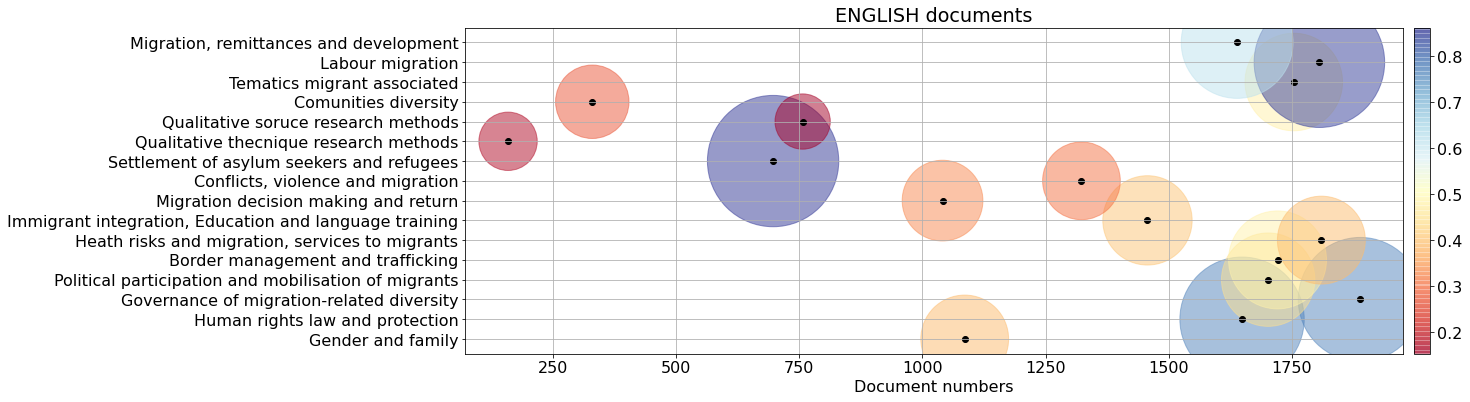

                                                  Dim  Counts  Percentaje
2           Governance of migration-related diversity    1889       97.93
5     Heath risks and migration, services to migrants    1810       93.83
14                                   Labour migration    1806       93.62
13                        Tematics migrant associated    1754       90.93
4                   Border management and trafficking    1721       89.22
3   Political participation and mobilisation of mi...    1702       88.23
1                     Human rights law and protection    1649       85.48
15             Migration, remittances and development    1639       84.97
6   Immigrant integration, Education and language ...    1457       75.53
8                   Conflicts, violence and migration    1323       68.58
0                                   Gender and family    1086       56.30
7                Migration decision making and return    1041       53.97
11                Qualitative soruce r

In [22]:
count_by_dim(data_en2,TH=TH,Lang="en")

# Artículos en Español

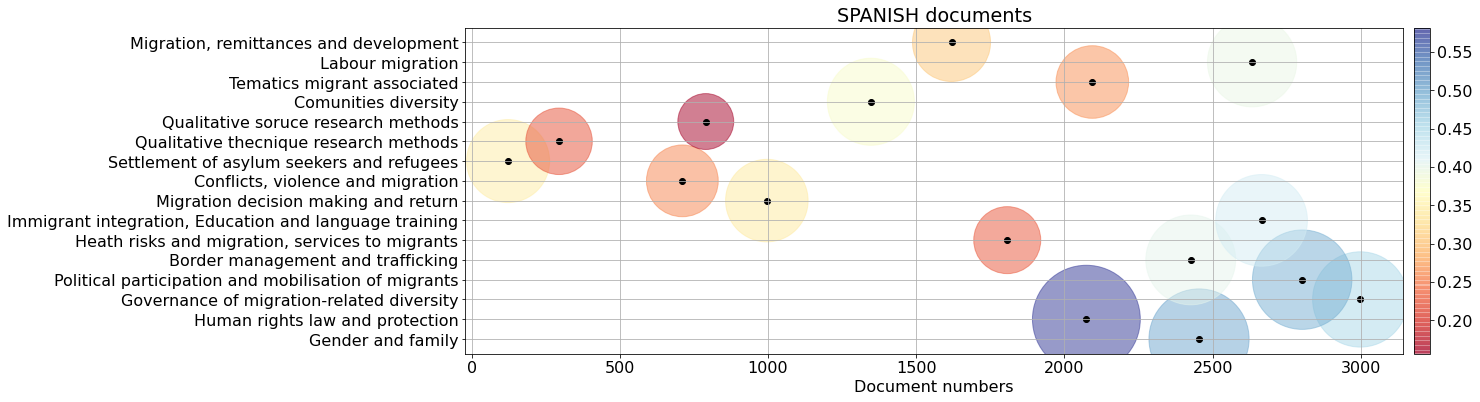

                                                  Dim  Counts  Percentaje
2           Governance of migration-related diversity    2998       88.44
3   Political participation and mobilisation of mi...    2802       82.65
6   Immigrant integration, Education and language ...    2665       78.61
14                                   Labour migration    2633       77.67
0                                   Gender and family    2454       72.39
4                   Border management and trafficking    2426       71.56
13                        Tematics migrant associated    2094       61.77
1                     Human rights law and protection    2074       61.18
5     Heath risks and migration, services to migrants    1807       53.30
15             Migration, remittances and development    1619       47.76
12                               Comunities diversity    1347       39.73
7                Migration decision making and return     996       29.38
11                Qualitative soruce r

In [23]:
count_by_dim(data_es2,TH=TH,Lang="es")

# Todos los documentos (Español e Inglés)

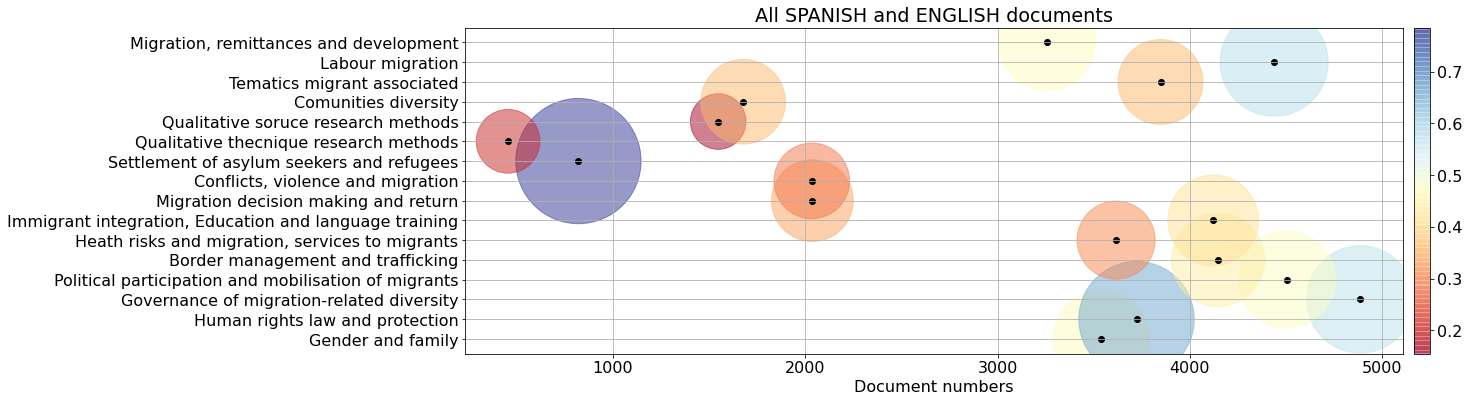

                                                  Dim  Counts  Percentaje
2           Governance of migration-related diversity    4887       91.88
3   Political participation and mobilisation of mi...    4504       84.68
14                                   Labour migration    4439       83.46
4                   Border management and trafficking    4147       77.97
6   Immigrant integration, Education and language ...    4122       77.50
13                        Tematics migrant associated    3848       72.34
1                     Human rights law and protection    3723       69.99
5     Heath risks and migration, services to migrants    3617       68.00
0                                   Gender and family    3540       66.55
15             Migration, remittances and development    3258       61.25
7                Migration decision making and return    2037       38.30
8                   Conflicts, violence and migration    2034       38.24
12                               Comun

In [24]:
count_by_dim(data_all,TH=TH,Lang="all")

# Artículos en Inglés

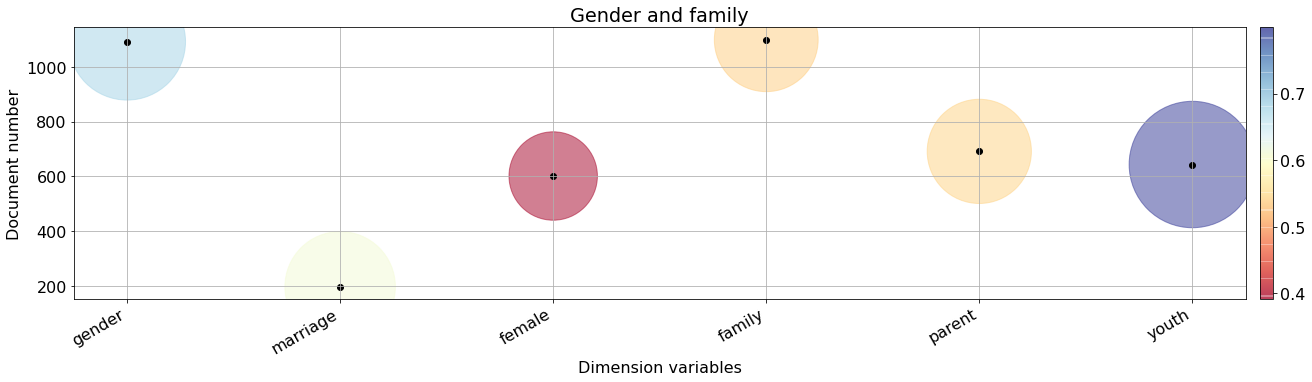

      Topic  Counts  Percentaje
3    family    1099       56.97
0    gender    1092       56.61
4    parent     691       35.82
5     youth     643       33.33
2    female     601       31.16
1  marriage     196       10.16


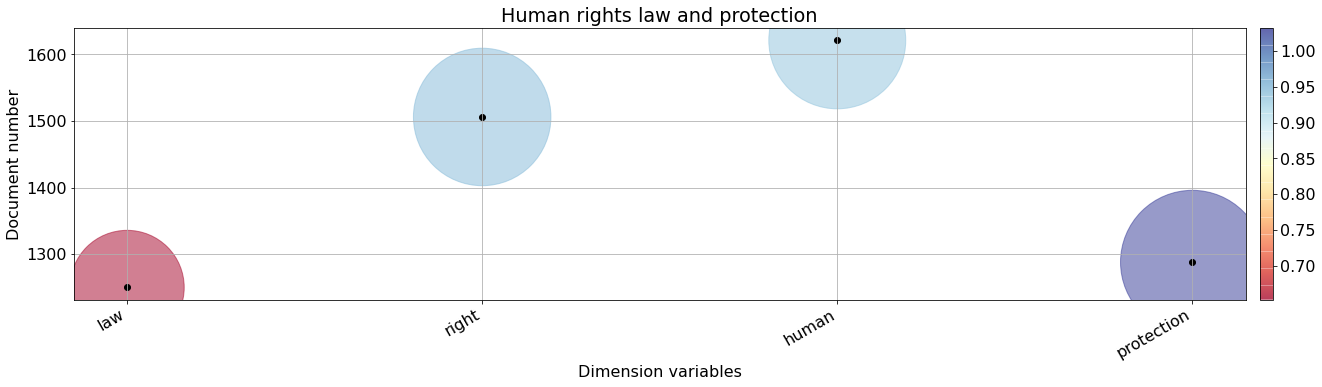

        Topic  Counts  Percentaje
2       human    1621       84.03
1       right    1506       78.07
3  protection    1288       66.77
0         law    1250       64.80


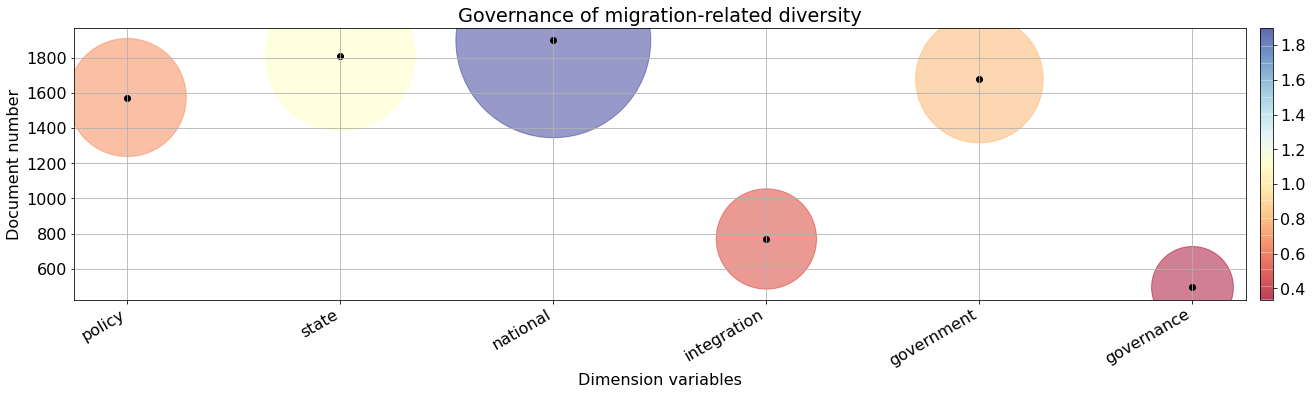

         Topic  Counts  Percentaje
2     national    1901       98.55
1        state    1810       93.83
4   government    1680       87.09
0       policy    1575       81.65
3  integration     769       39.87
5   governance     493       25.56


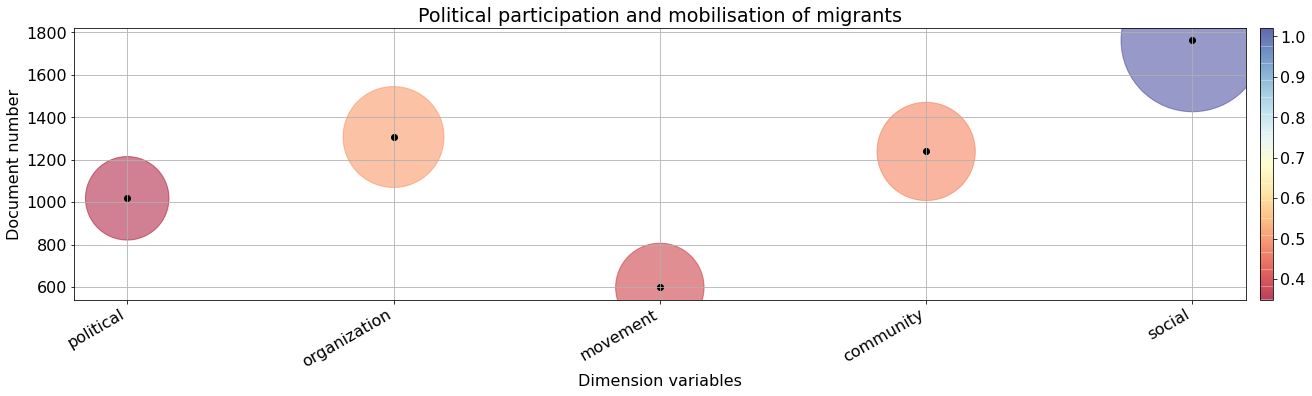

          Topic  Counts  Percentaje
4        social    1763       91.39
1  organization    1307       67.76
3     community    1239       64.23
0     political    1018       52.77
2      movement     598       31.00


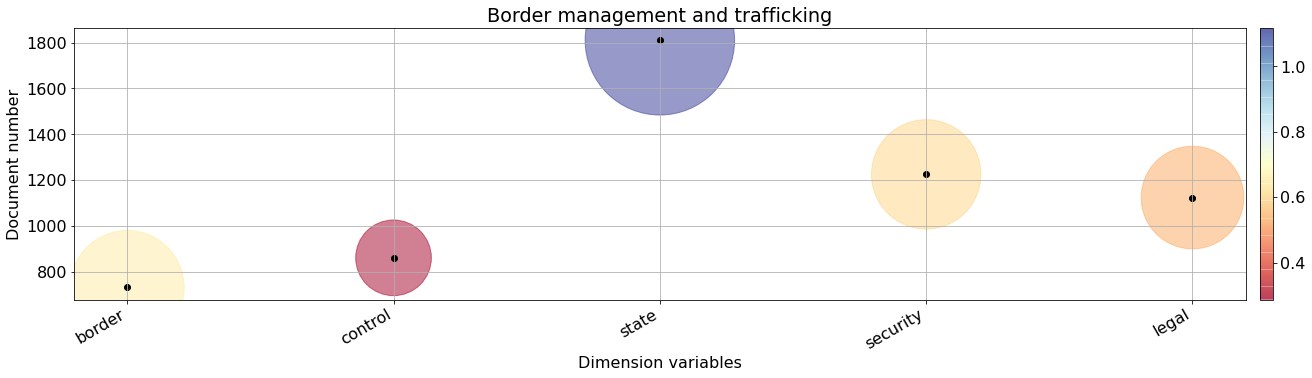

      Topic  Counts  Percentaje
2     state    1810       93.83
3  security    1225       63.50
4     legal    1124       58.27
1   control     861       44.63
0    border     732       37.95


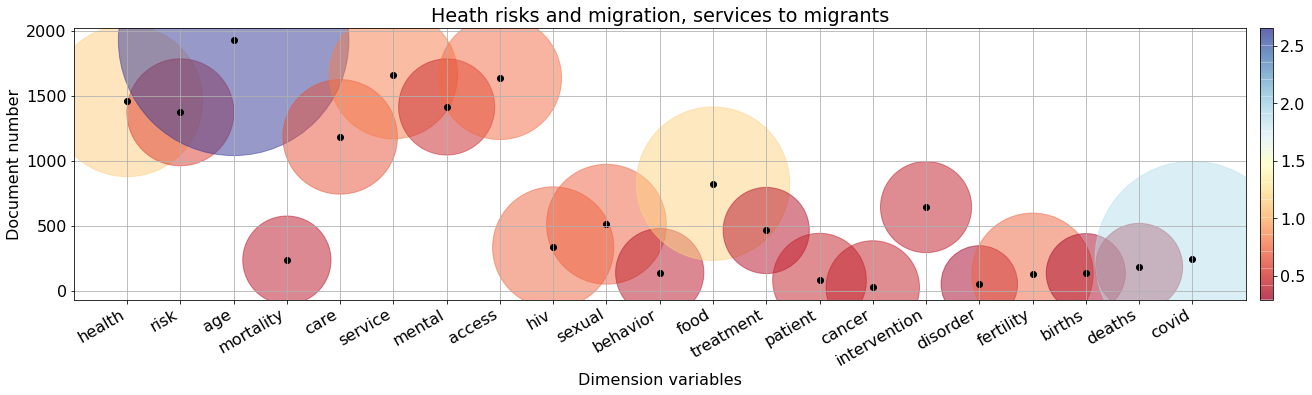

           Topic  Counts  Percentaje
2            age    1925       99.79
5        service    1661       86.11
7         access    1636       84.81
0         health    1459       75.64
6         mental    1413       73.25
1           risk    1372       71.12
4           care    1183       61.33
11          food     823       42.66
15  intervention     643       33.33
9         sexual     511       26.49
12     treatment     463       24.00
8            hiv     333       17.26
20         covid     246       12.75
3      mortality     235       12.18
19        deaths     183        9.49
10      behavior     139        7.21
18        births     135        7.00
17     fertility     131        6.79
13       patient      81        4.20
16      disorder      52        2.70
14        cancer      25        1.30


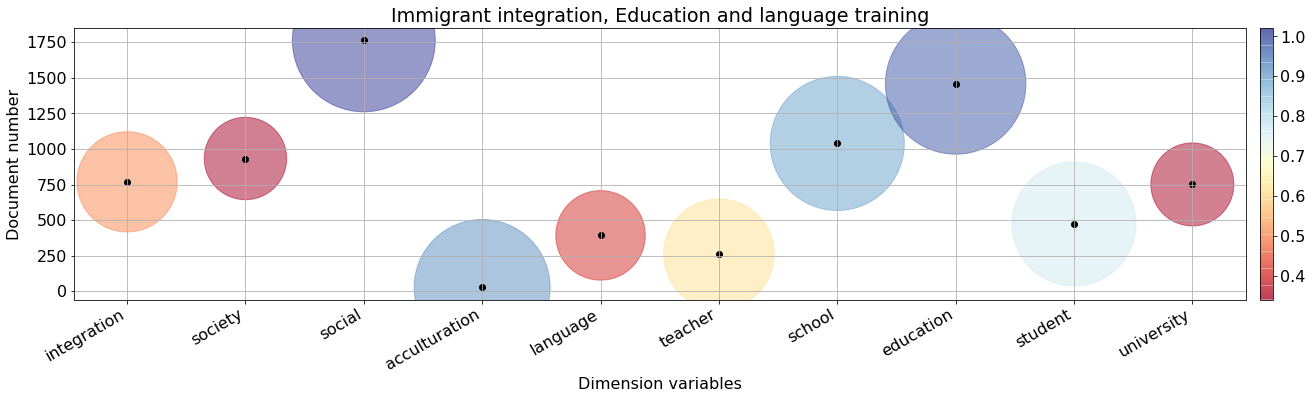

           Topic  Counts  Percentaje
2         social    1763       91.39
7      education    1457       75.53
6         school    1039       53.86
1        society     933       48.37
0    integration     769       39.87
9     university     751       38.93
8        student     473       24.52
4       language     393       20.37
5        teacher     260       13.48
3  acculturation      27        1.40


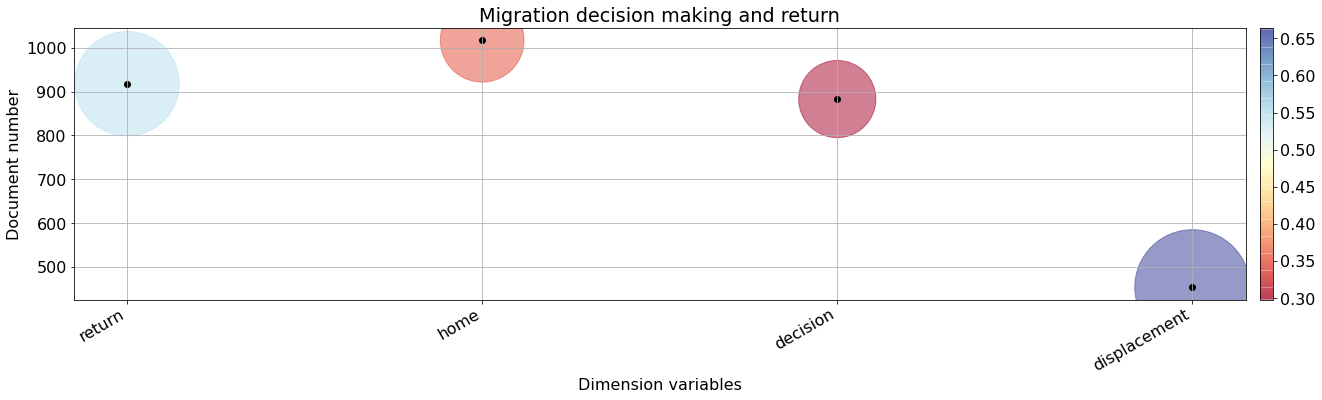

          Topic  Counts  Percentaje
1          home    1017       52.72
0        return     918       47.59
2      decision     883       45.78
3  displacement     454       23.54


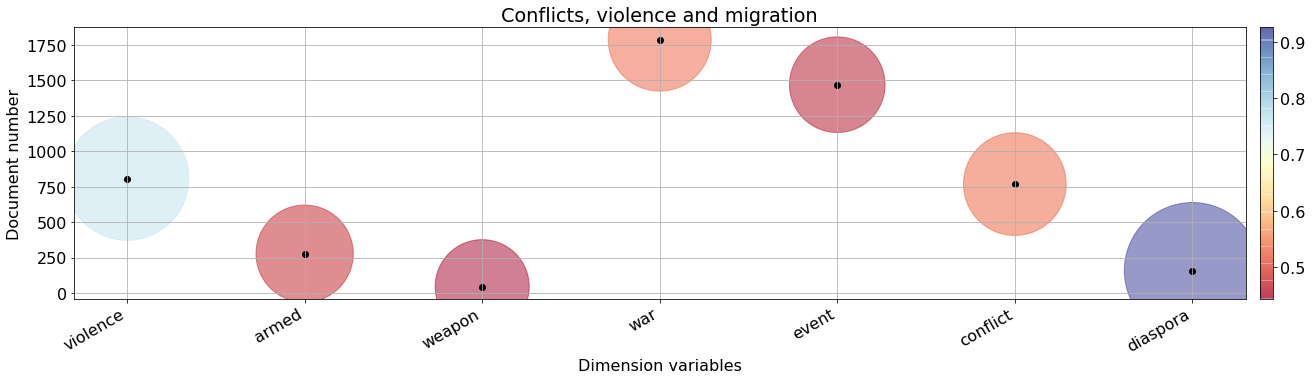

      Topic  Counts  Percentaje
3       war    1787       92.64
4     event    1469       76.15
0  violence     807       41.84
5  conflict     768       39.81
1     armed     277       14.36
6  diaspora     158        8.19
2    weapon      44        2.28


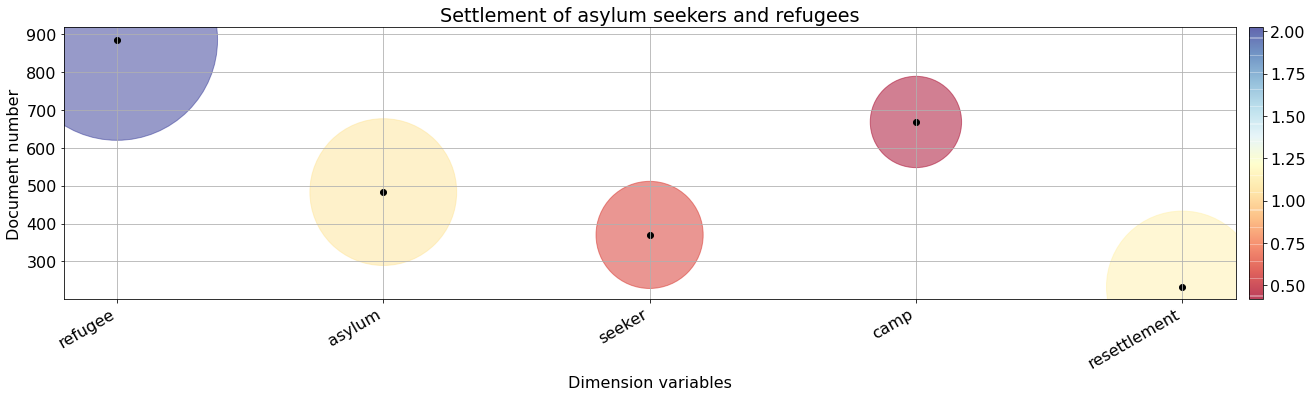

          Topic  Counts  Percentaje
0       refugee     885       45.88
3          camp     668       34.63
1        asylum     483       25.04
2        seeker     370       19.18
4  resettlement     233       12.08


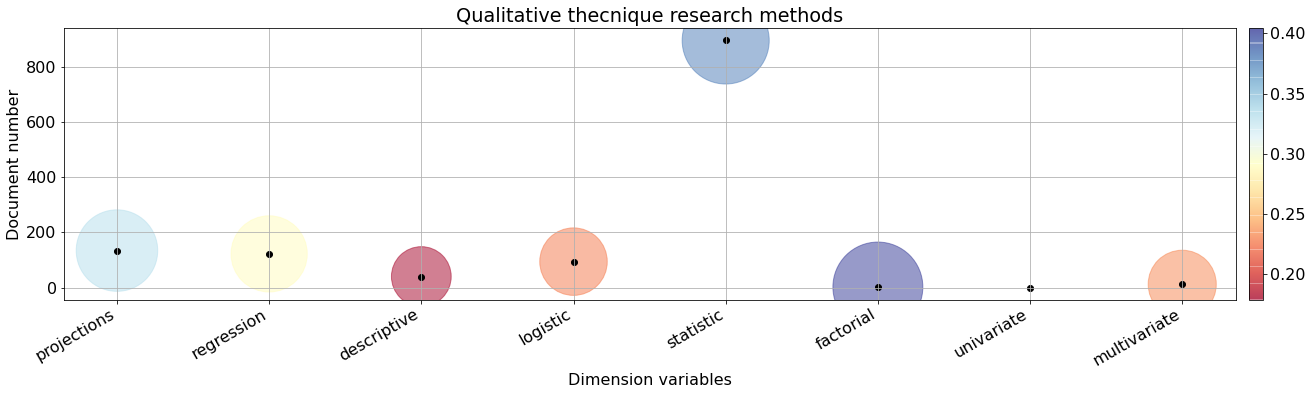

          Topic  Counts  Percentaje
4     statistic     895       46.40
0   projections     134        6.95
1    regression     122        6.32
3      logistic      94        4.87
2   descriptive      40        2.07
7  multivariate      12        0.62
5     factorial       2        0.10
6    univariate       0        0.00


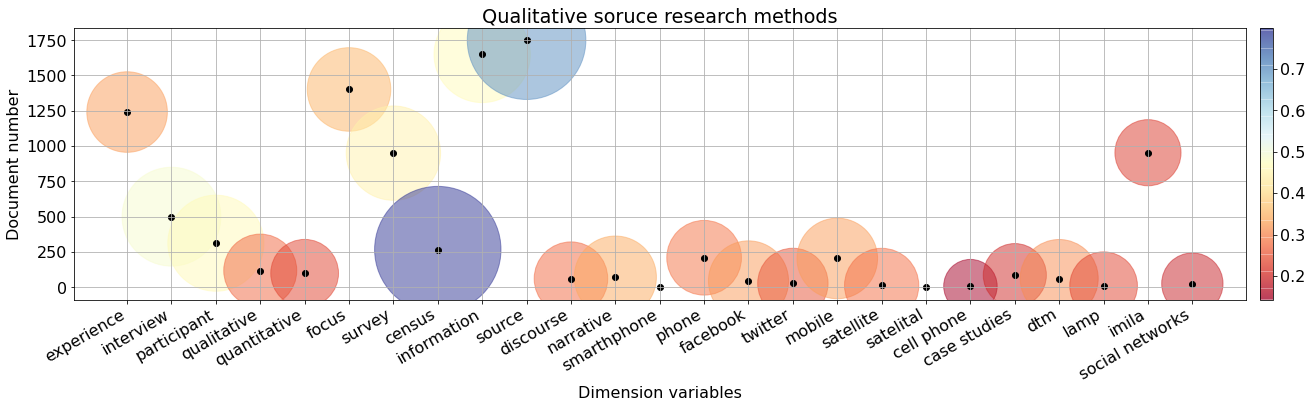

              Topic  Counts  Percentaje
9            source    1750       90.72
8       information    1649       85.48
5             focus    1401       72.63
0        experience    1241       64.33
23            imila     953       49.40
6            survey     950       49.25
1         interview     500       25.92
2       participant     312       16.17
7            census     267       13.84
13            phone     209       10.83
16           mobile     204       10.58
3       qualitative     118        6.12
4      quantitative      99        5.13
20     case studies      86        4.46
11        narrative      72        3.73
21              dtm      62        3.21
10        discourse      61        3.16
14         facebook      45        2.33
15          twitter      27        1.40
24  social networks      26        1.35
17        satellite      13        0.67
22             lamp      11        0.57
19       cell phone       8        0.41
18        satelital       0        0.00


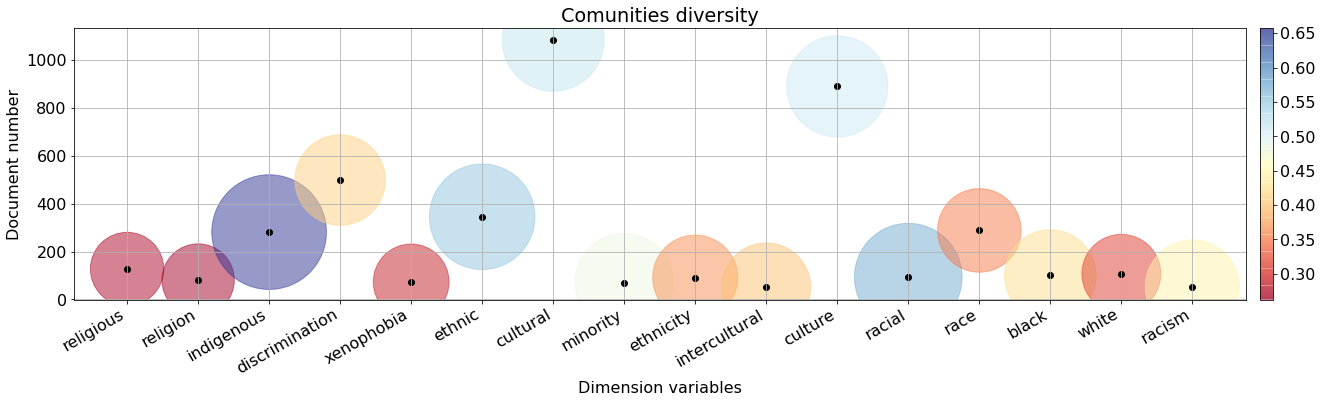

             Topic  Counts  Percentaje
6         cultural    1081       56.04
10         culture     889       46.09
3   discrimination     498       25.82
5           ethnic     345       17.88
12            race     288       14.93
2       indigenous     281       14.57
0        religious     127        6.58
14           white     107        5.55
13           black     100        5.18
11          racial      93        4.82
8        ethnicity      91        4.72
1         religion      81        4.20
4       xenophobia      73        3.78
7         minority      70        3.63
15          racism      52        2.70
9    intercultural      50        2.59


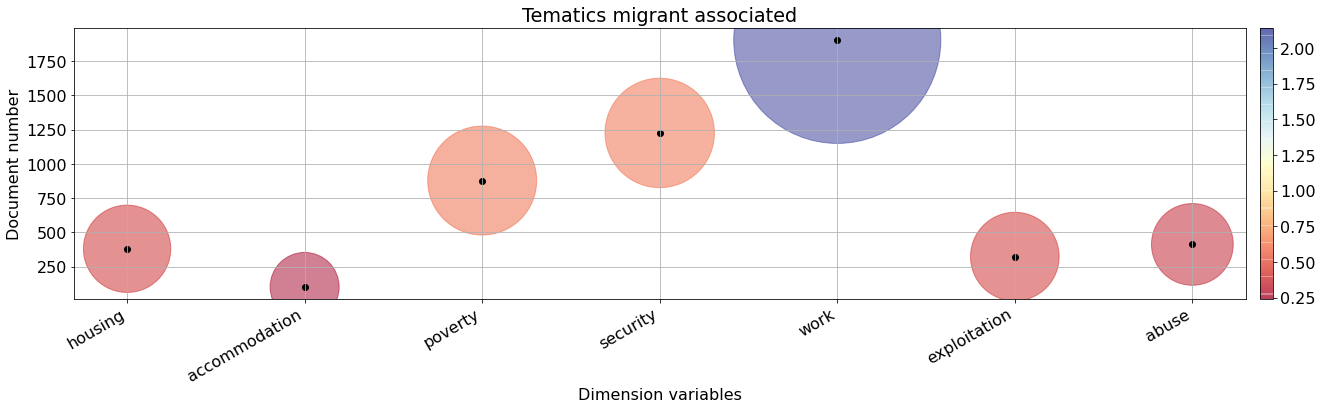

           Topic  Counts  Percentaje
4           work    1903       98.65
3       security    1225       63.50
2        poverty     878       45.52
6          abuse     413       21.41
0        housing     381       19.75
5   exploitation     324       16.80
1  accommodation     103        5.34


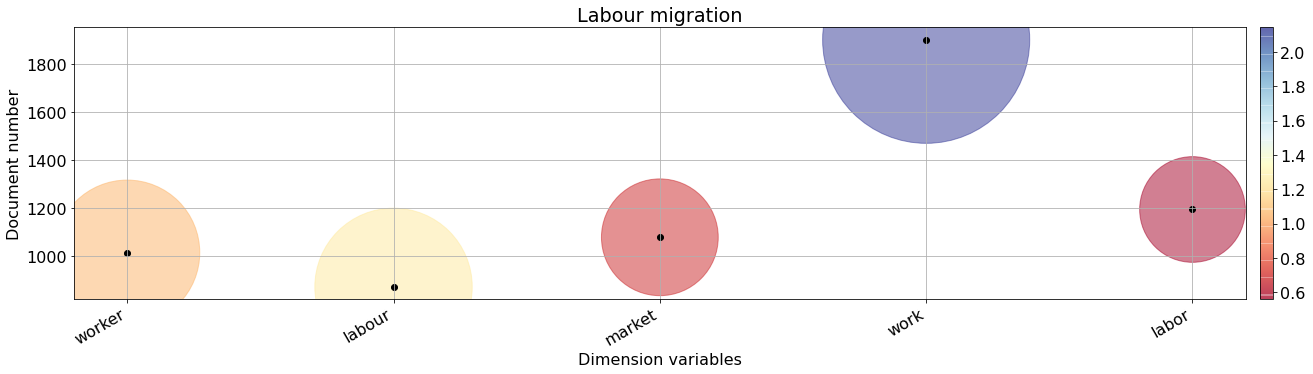

    Topic  Counts  Percentaje
3    work    1903       98.65
4   labor    1195       61.95
2  market    1079       55.94
0  worker    1015       52.62
1  labour     872       45.20


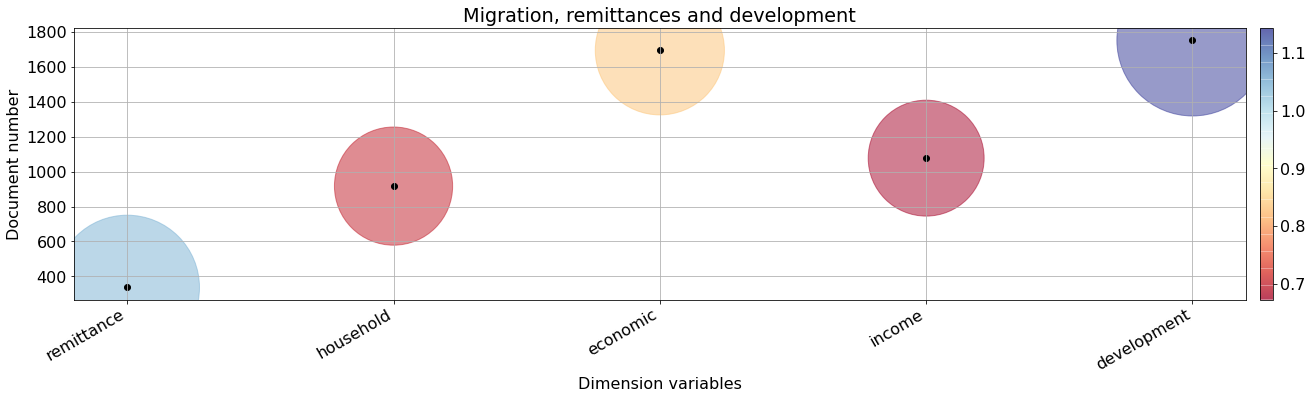

         Topic  Counts  Percentaje
4  development    1751       90.77
2     economic    1694       87.82
3       income    1077       55.83
1    household     917       47.54
0   remittance     337       17.47


In [25]:
for i,j in zip([e1,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17],[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]):
    count_by_crit(data_en2,i,lab=j,TH=TH,plot=True,table=True,den=True)

# Artículos en Español

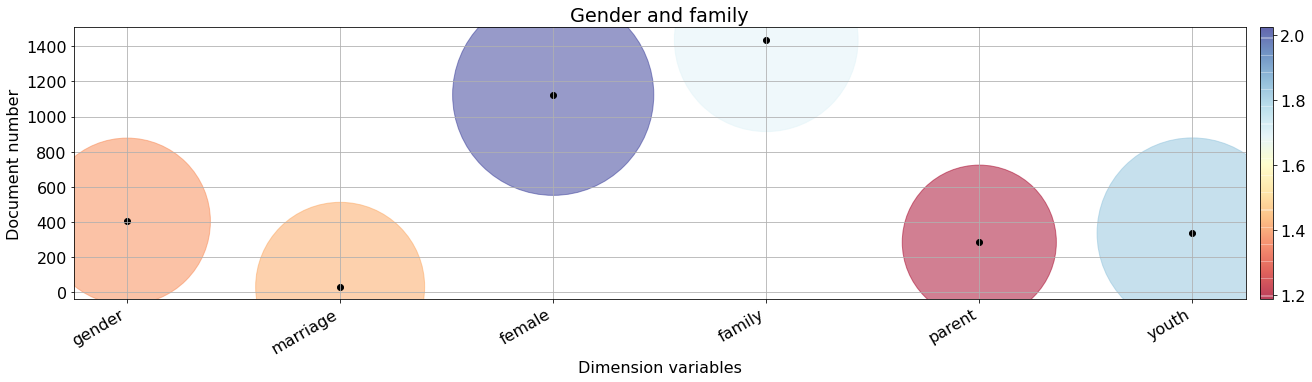

      Topic  Counts  Percentaje
3    family    1437       42.39
2    female    1124       33.16
0    gender     404       11.92
5     youth     337        9.94
4    parent     286        8.44
1  marriage      32        0.94


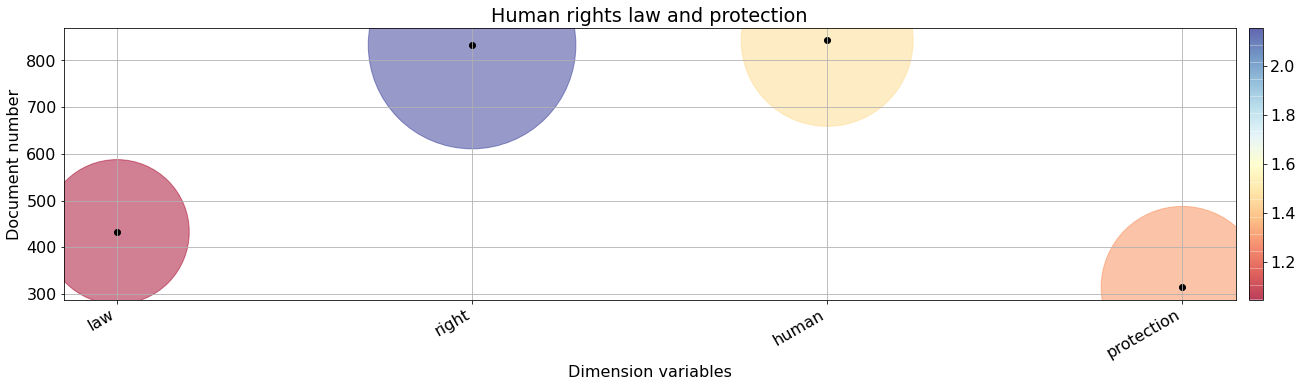

        Topic  Counts  Percentaje
2       human     843       24.87
1       right     833       24.57
0         law     433       12.77
3  protection     314        9.26


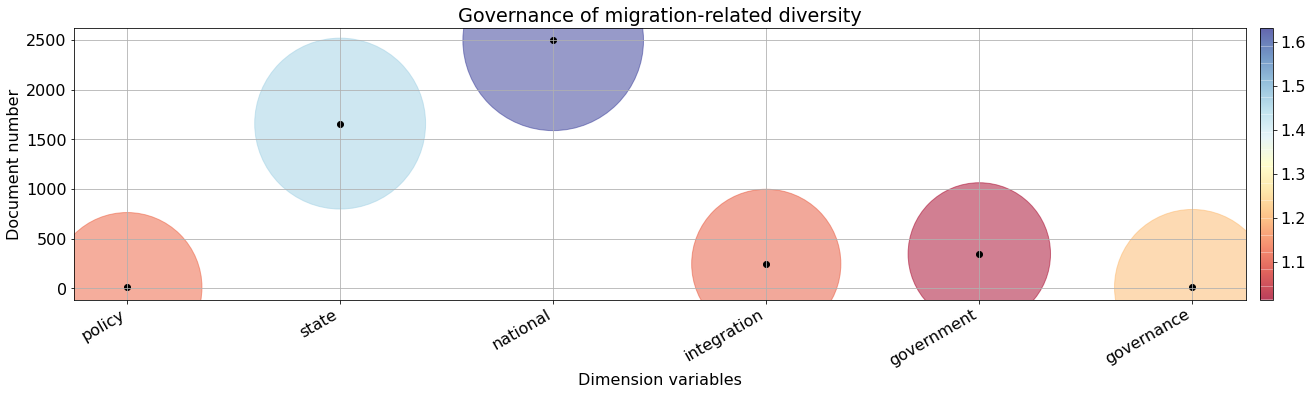

         Topic  Counts  Percentaje
2     national    2498       73.69
1        state    1659       48.94
4   government     346       10.21
3  integration     246        7.26
5   governance      10        0.29
0       policy       9        0.27


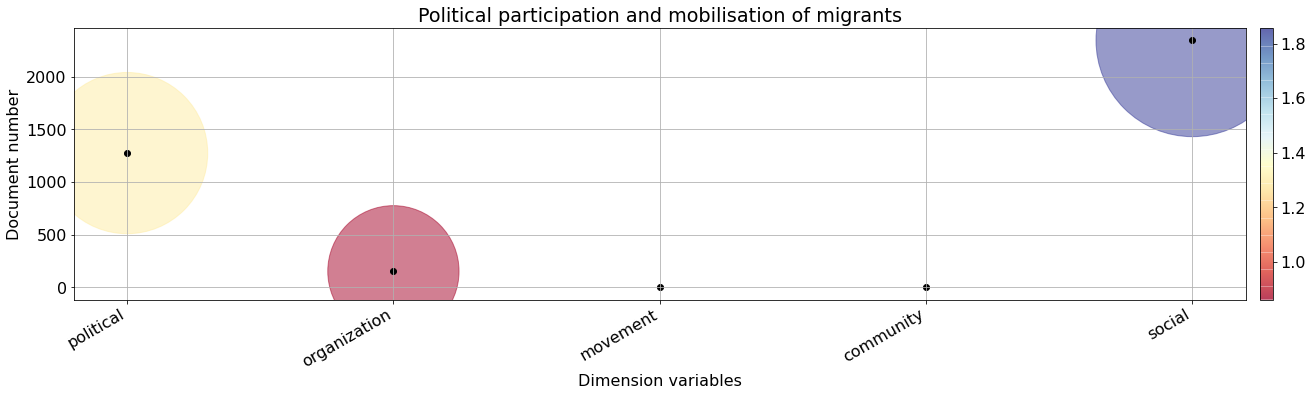

          Topic  Counts  Percentaje
4        social    2346       69.20
0     political    1275       37.61
1  organization     153        4.51
2      movement       0        0.00
3     community       0        0.00


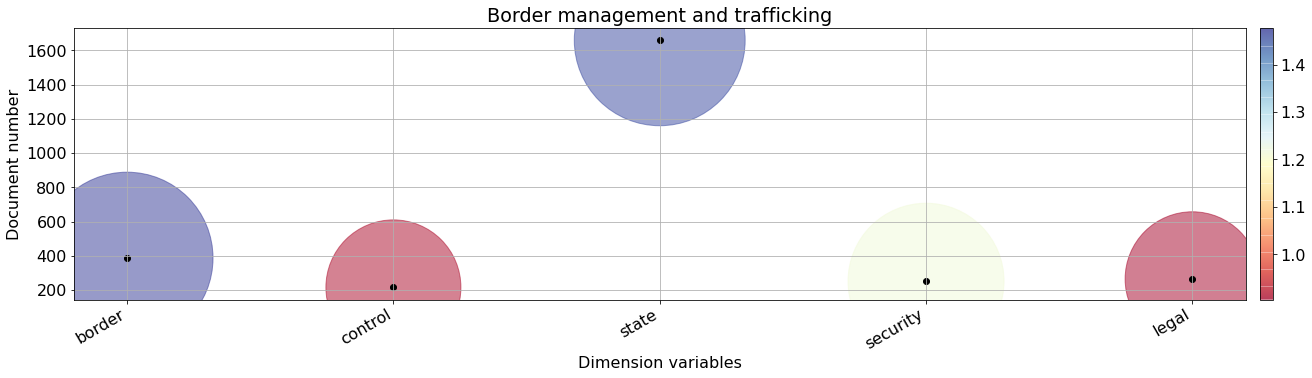

      Topic  Counts  Percentaje
2     state    1659       48.94
0    border     387       11.42
4     legal     265        7.82
3  security     252        7.43
1   control     216        6.37


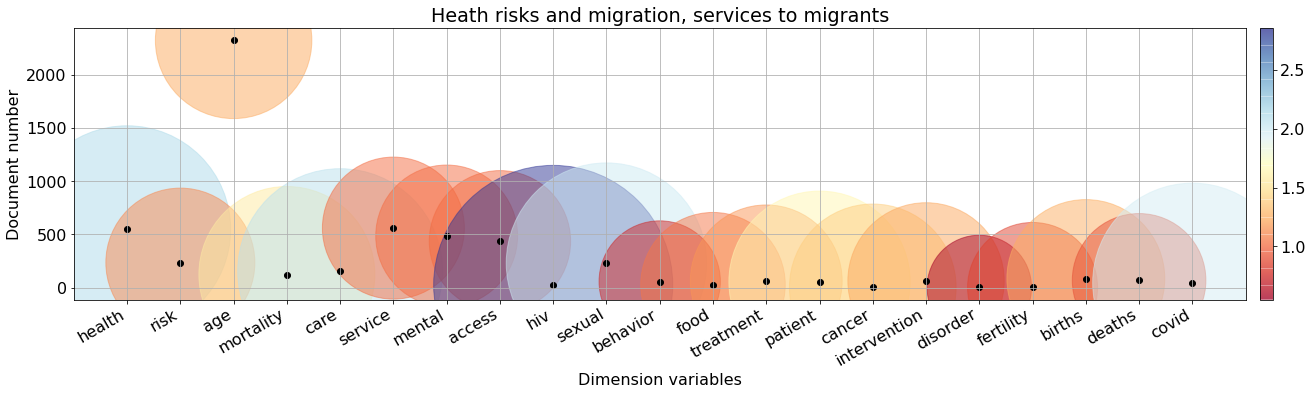

           Topic  Counts  Percentaje
2            age    2328       68.67
5        service     560       16.52
0         health     548       16.17
6         mental     486       14.34
7         access     436       12.86
1           risk     235        6.93
9         sexual     230        6.78
4           care     155        4.57
3      mortality     123        3.63
18        births      85        2.51
19        deaths      68        2.01
15  intervention      63        1.86
12     treatment      63        1.86
10      behavior      57        1.68
13       patient      55        1.62
20         covid      45        1.33
11          food      27        0.80
8            hiv      25        0.74
14        cancer       2        0.06
16      disorder       1        0.03
17     fertility       1        0.03


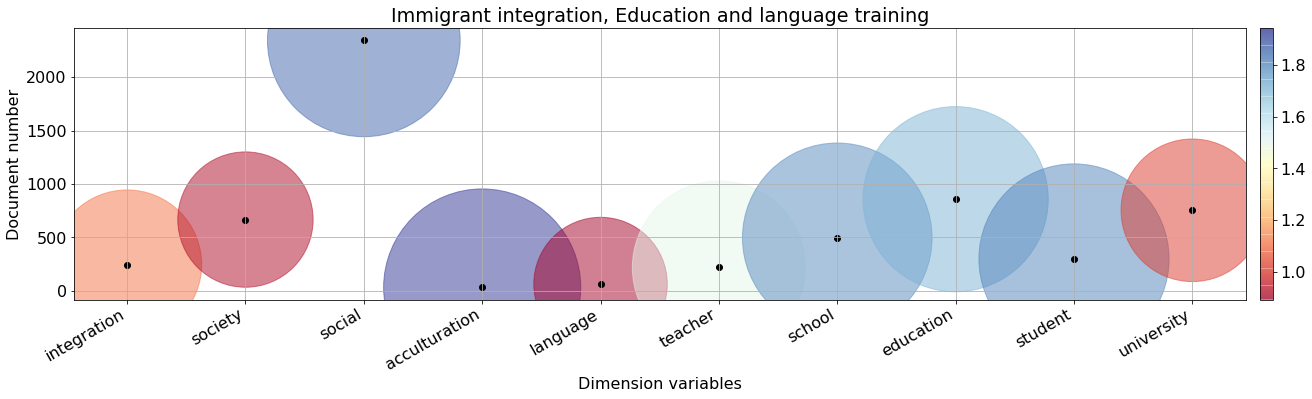

           Topic  Counts  Percentaje
2         social    2346       69.20
7      education     858       25.31
9     university     754       22.24
1        society     667       19.68
6         school     496       14.63
8        student     298        8.79
0    integration     246        7.26
5        teacher     218        6.43
4       language      63        1.86
3  acculturation      31        0.91


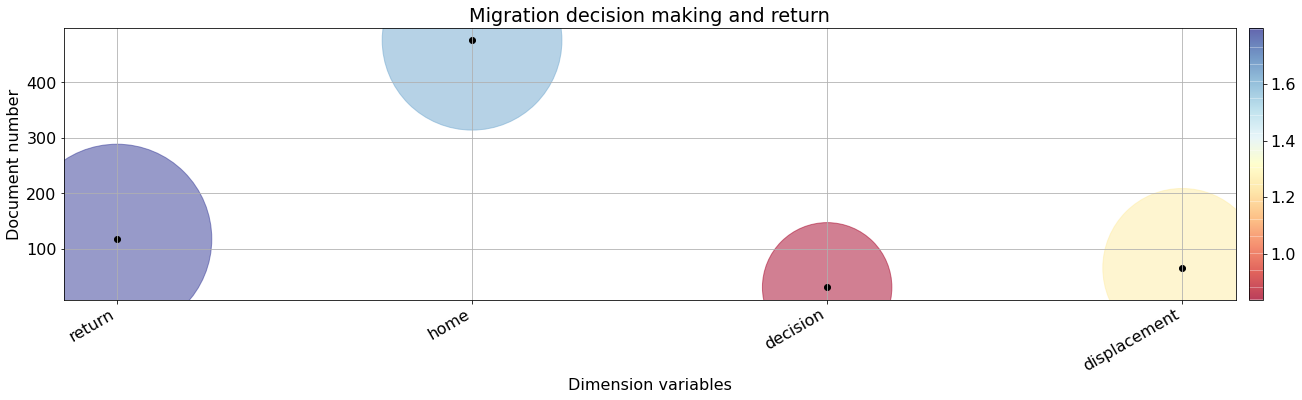

          Topic  Counts  Percentaje
1          home     476       14.04
0        return     118        3.48
3  displacement      66        1.95
2      decision      31        0.91


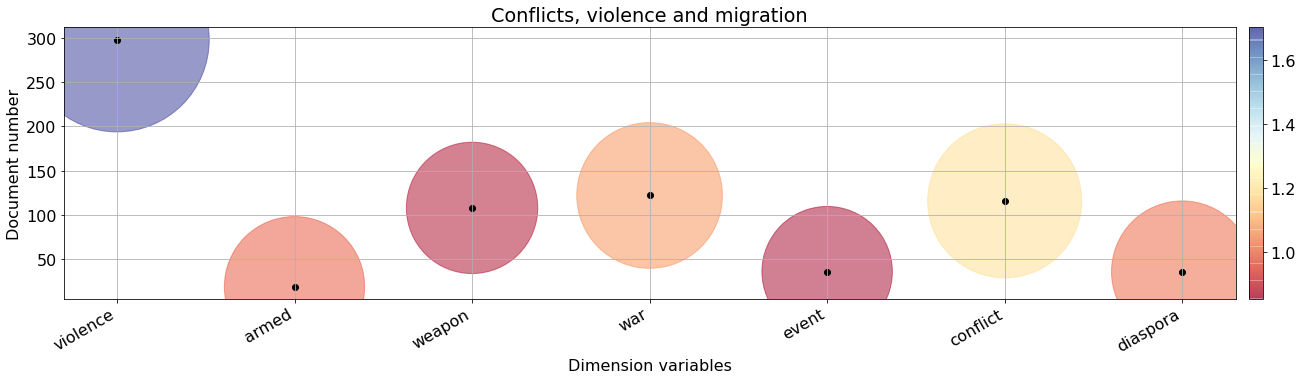

      Topic  Counts  Percentaje
0  violence     298        8.79
3       war     122        3.60
5  conflict     116        3.42
2    weapon     108        3.19
4     event      36        1.06
6  diaspora      36        1.06
1     armed      19        0.56


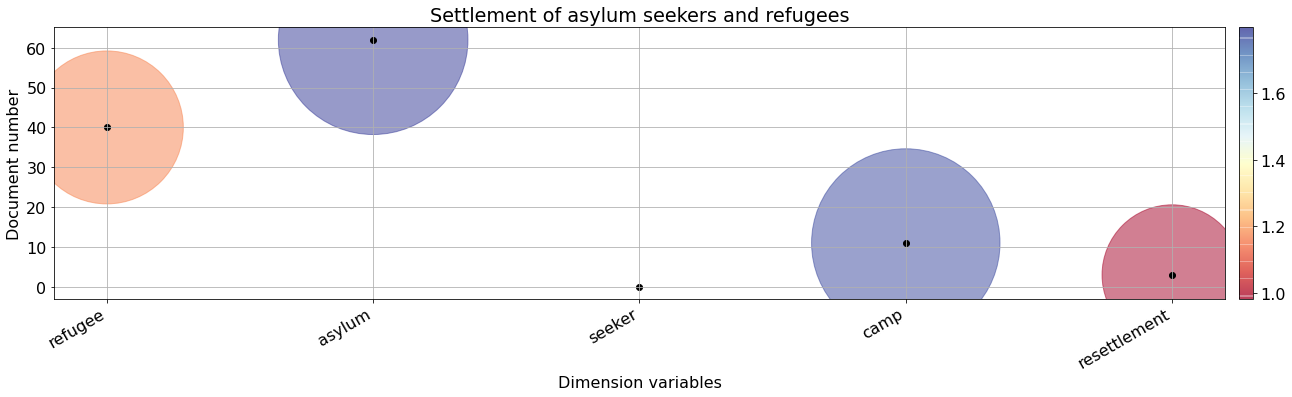

          Topic  Counts  Percentaje
1        asylum      62        1.83
0       refugee      40        1.18
3          camp      11        0.32
4  resettlement       3        0.09
2        seeker       0        0.00


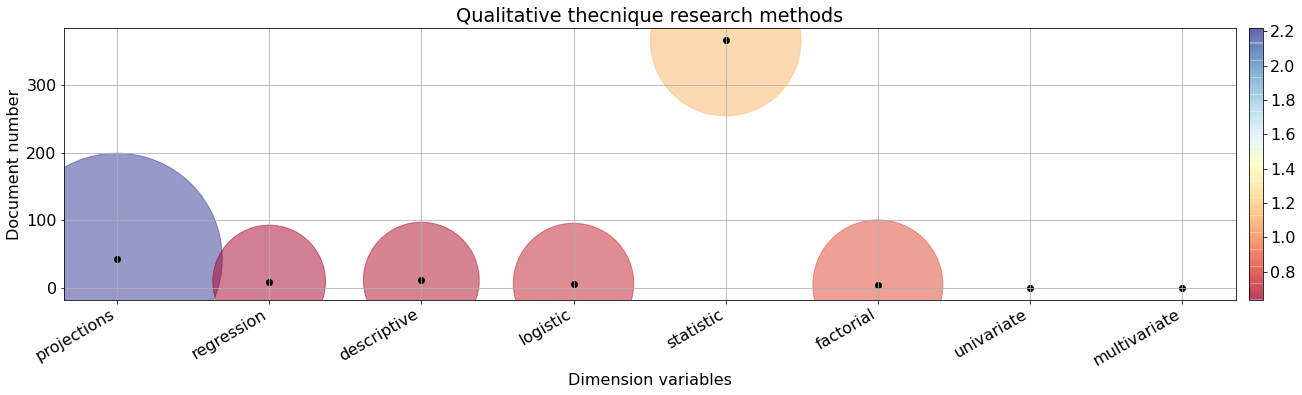

          Topic  Counts  Percentaje
4     statistic     366       10.80
0   projections      43        1.27
2   descriptive      11        0.32
1    regression       9        0.27
3      logistic       6        0.18
5     factorial       4        0.12
6    univariate       0        0.00
7  multivariate       0        0.00


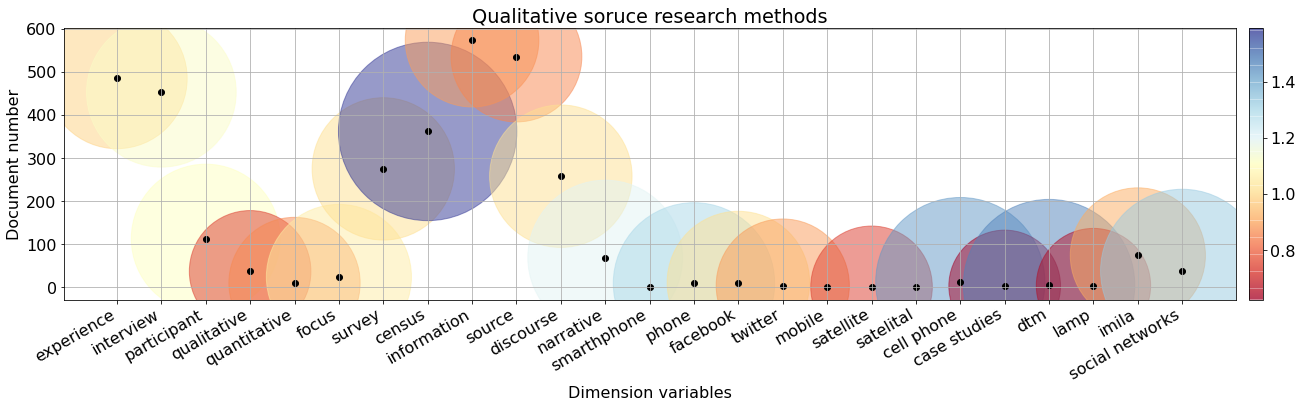

              Topic  Counts  Percentaje
8       information     574       16.93
9            source     536       15.81
0        experience     485       14.31
1         interview     453       13.36
7            census     362       10.68
6            survey     275        8.11
10        discourse     258        7.61
2       participant     113        3.33
23            imila      74        2.18
11        narrative      69        2.04
24  social networks      38        1.12
3       qualitative      37        1.09
5             focus      24        0.71
19       cell phone      12        0.35
14         facebook      11        0.32
4      quantitative      10        0.29
13            phone       9        0.27
21              dtm       5        0.15
15          twitter       4        0.12
22             lamp       4        0.12
20     case studies       3        0.09
17        satellite       1        0.03
16           mobile       0        0.00
18        satelital       0        0.00


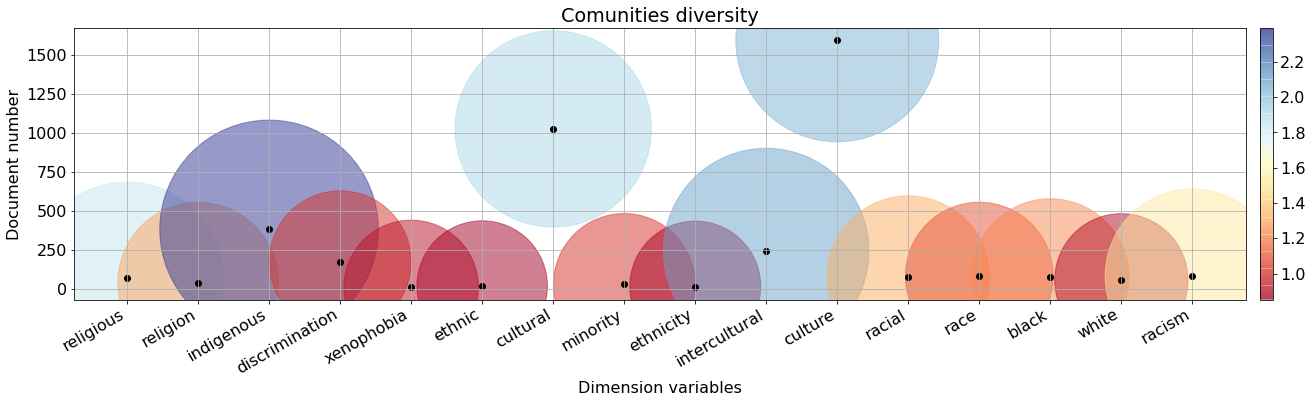

             Topic  Counts  Percentaje
10         culture    1591       46.93
6         cultural    1025       30.24
2       indigenous     382       11.27
9    intercultural     244        7.20
3   discrimination     175        5.16
12            race      84        2.48
15          racism      84        2.48
11          racial      78        2.30
13           black      77        2.27
0        religious      70        2.06
14           white      57        1.68
1         religion      42        1.24
7         minority      31        0.91
5           ethnic      20        0.59
8        ethnicity      17        0.50
4       xenophobia      11        0.32


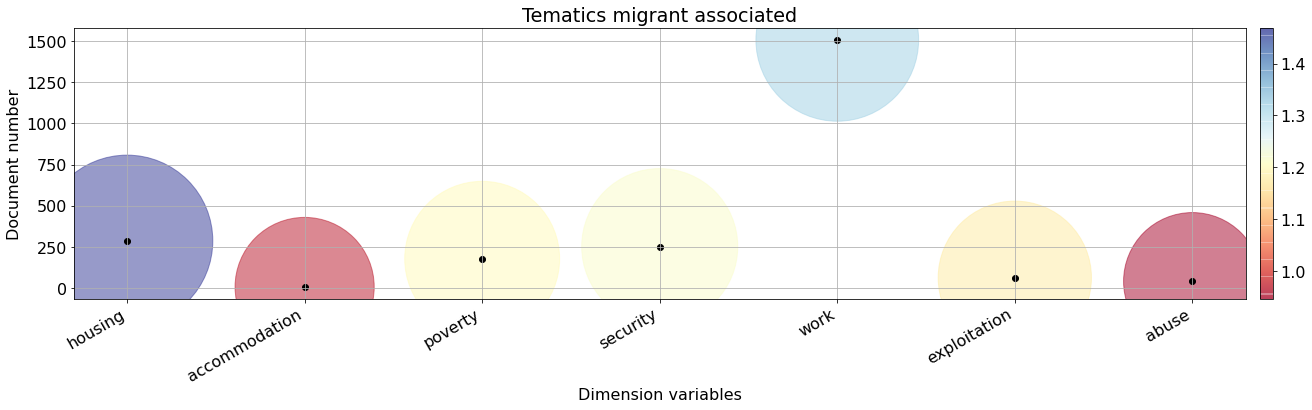

           Topic  Counts  Percentaje
4           work    1507       44.45
0        housing     287        8.47
3       security     252        7.43
2        poverty     178        5.25
5   exploitation      63        1.86
6          abuse      41        1.21
1  accommodation       7        0.21


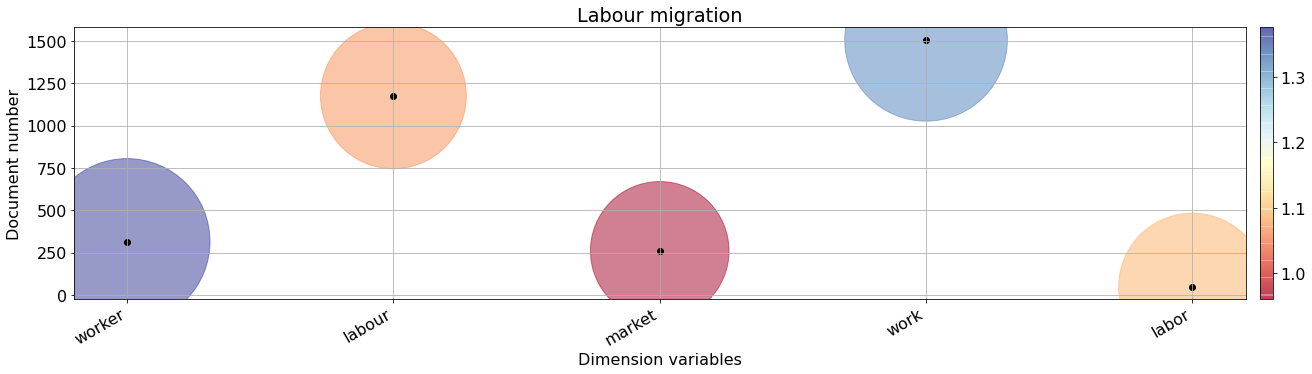

    Topic  Counts  Percentaje
3    work    1507       44.45
1  labour    1176       34.69
0  worker     315        9.29
2  market     260        7.67
4   labor      47        1.39


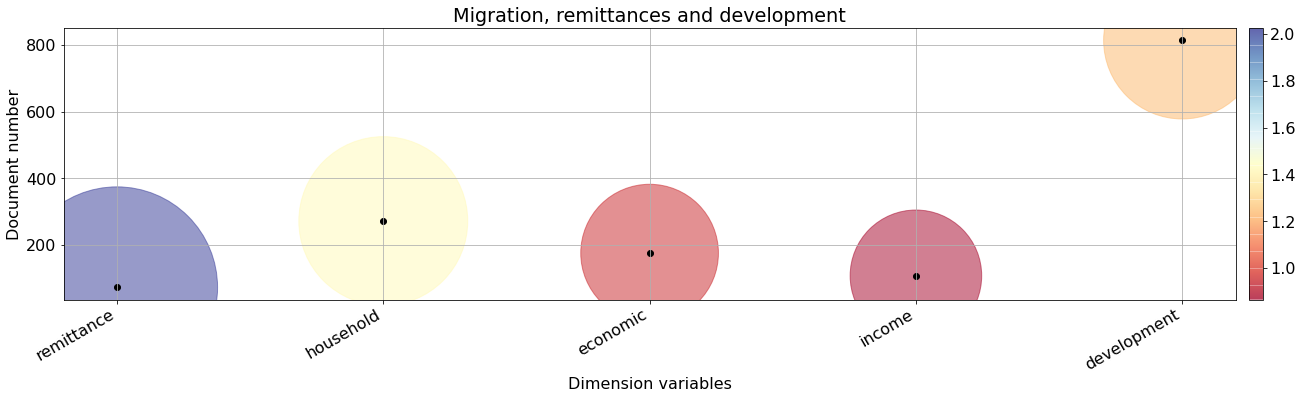

         Topic  Counts  Percentaje
4  development     814       24.01
1    household     272        8.02
2     economic     176        5.19
3       income     108        3.19
0   remittance      73        2.15


In [26]:
for i,j in zip([e1,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17],[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]):
    count_by_crit(data_es2,i,lab=j,TH=0.5,plot=True,table=True,den=True)

# **Todos los documentos (Español e Inglés)**

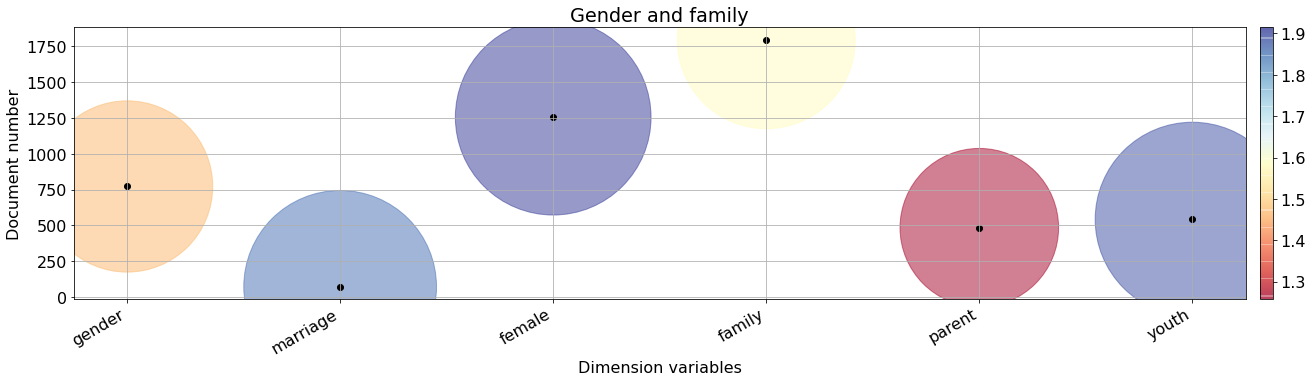

      Topic  Counts  Percentaje
3    family    1797       33.78
2    female    1256       23.61
0    gender     772       14.51
5     youth     542       10.19
4    parent     484        9.10
1  marriage      71        1.33


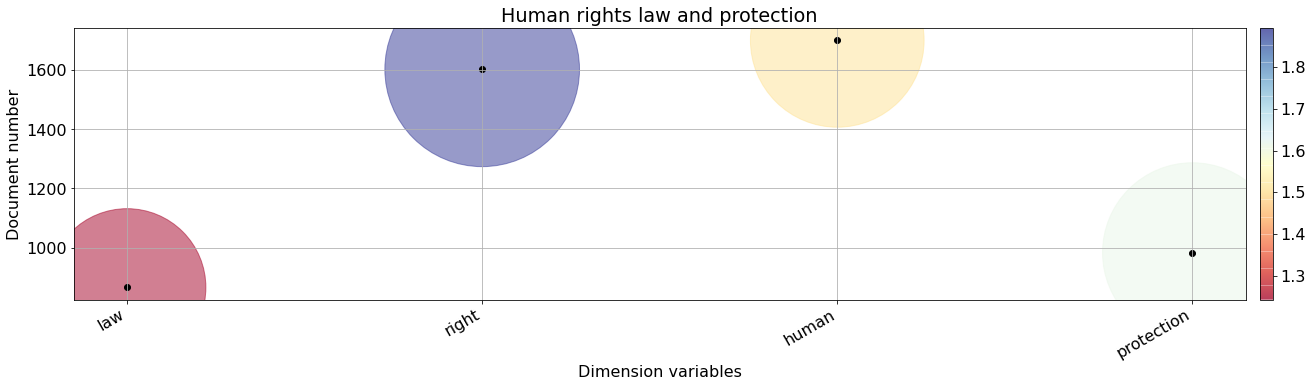

        Topic  Counts  Percentaje
2       human    1701       31.98
1       right    1603       30.14
3  protection     983       18.48
0         law     865       16.26


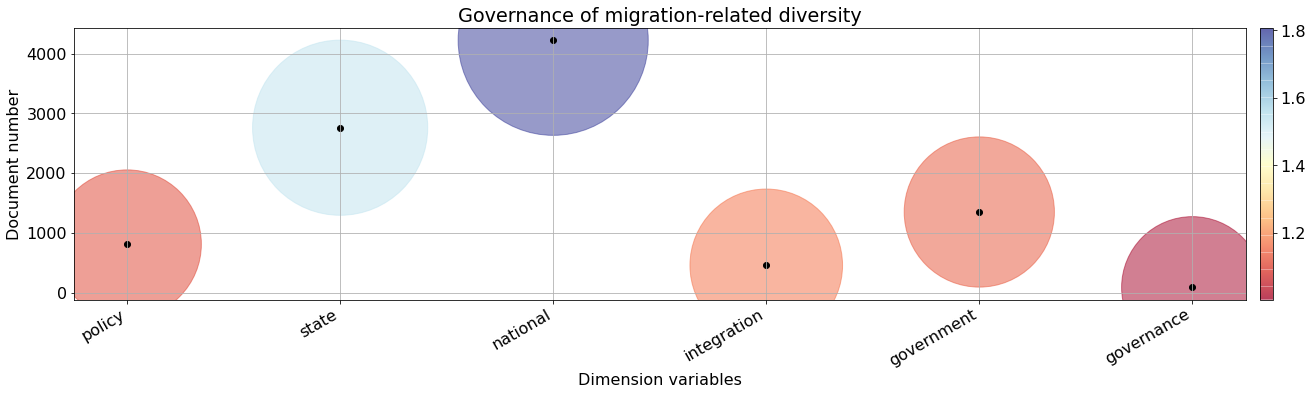

         Topic  Counts  Percentaje
2     national    4221       79.36
1        state    2759       51.87
4   government    1349       25.36
0       policy     811       15.25
3  integration     457        8.59
5   governance      88        1.65


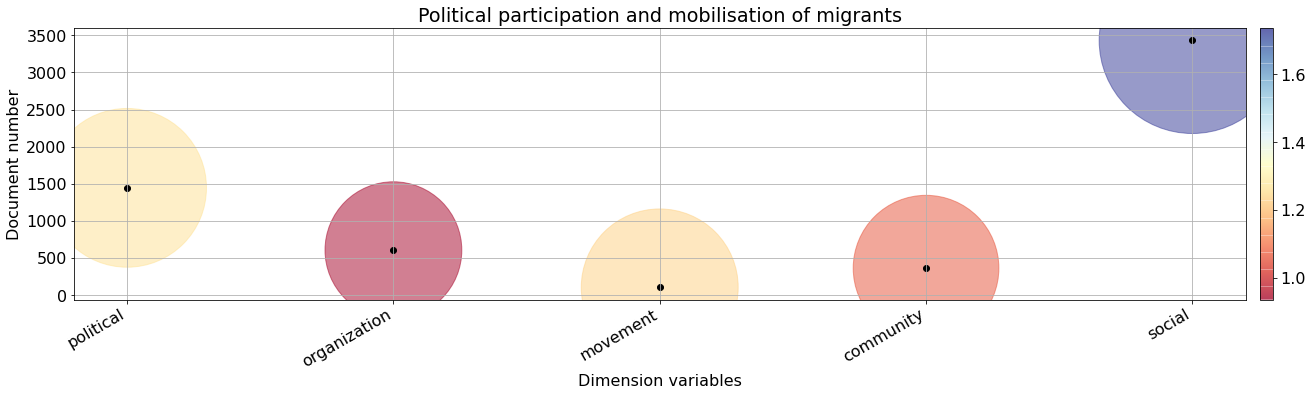

          Topic  Counts  Percentaje
4        social    3433       64.54
0     political    1447       27.20
1  organization     608       11.43
3     community     366        6.88
2      movement     107        2.01


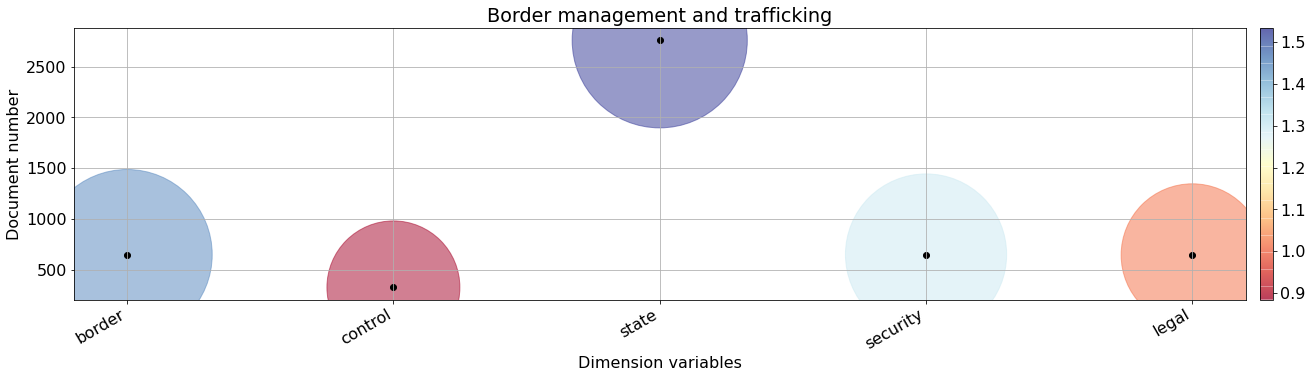

      Topic  Counts  Percentaje
2     state    2759       51.87
3  security     648       12.18
0    border     647       12.16
4     legal     643       12.09
1   control     324        6.09


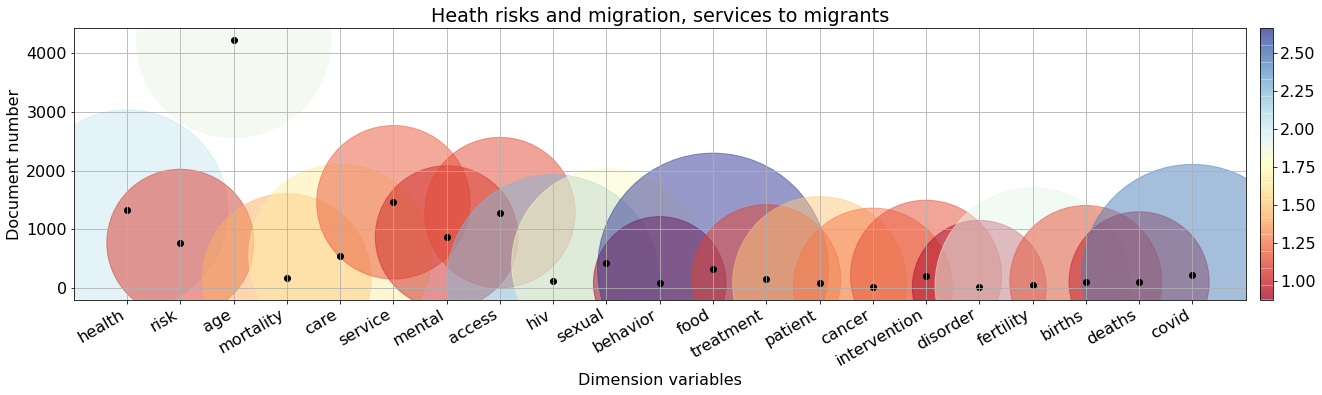

           Topic  Counts  Percentaje
2            age    4218       79.30
5        service    1459       27.43
0         health    1320       24.82
7         access    1282       24.10
6         mental     865       16.26
1           risk     768       14.44
4           care     550       10.34
9         sexual     421        7.92
11          food     330        6.20
20         covid     220        4.14
15  intervention     207        3.89
3      mortality     169        3.18
12     treatment     149        2.80
8            hiv     117        2.20
18        births     108        2.03
19        deaths     103        1.94
10      behavior      85        1.60
13       patient      75        1.41
17     fertility      41        0.77
16      disorder       9        0.17
14        cancer       7        0.13


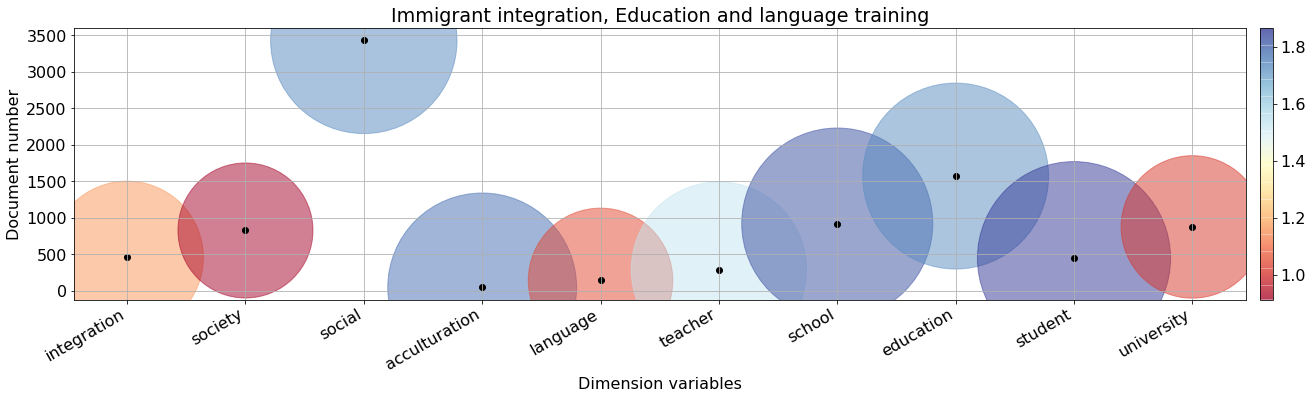

           Topic  Counts  Percentaje
2         social    3433       64.54
7      education    1573       29.57
6         school     922       17.33
9     university     876       16.47
1        society     827       15.55
0    integration     457        8.59
8        student     447        8.40
5        teacher     291        5.47
4       language     143        2.69
3  acculturation      46        0.86


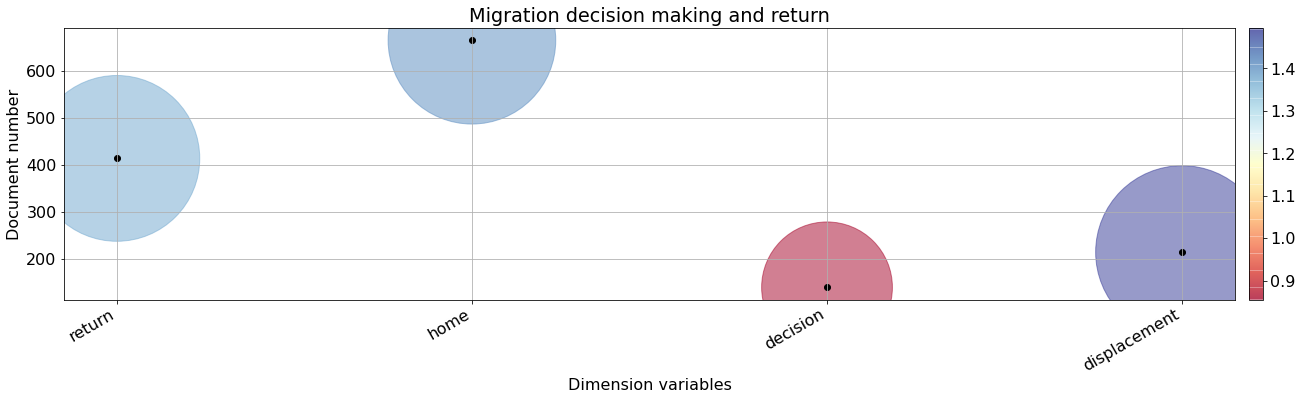

          Topic  Counts  Percentaje
1          home     666       12.52
0        return     414        7.78
3  displacement     214        4.02
2      decision     139        2.61


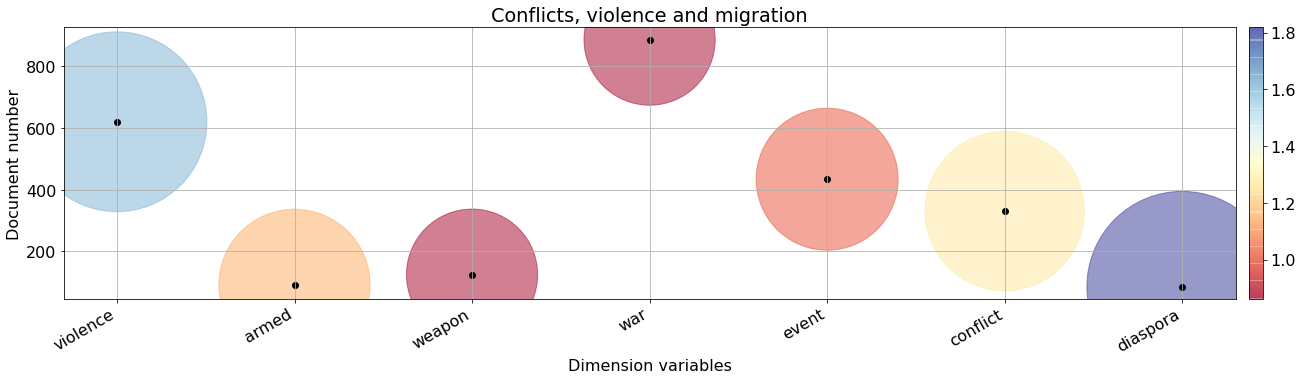

      Topic  Counts  Percentaje
3       war     886       16.66
0  violence     620       11.66
4     event     434        8.16
5  conflict     331        6.22
2    weapon     125        2.35
1     armed      92        1.73
6  diaspora      86        1.62


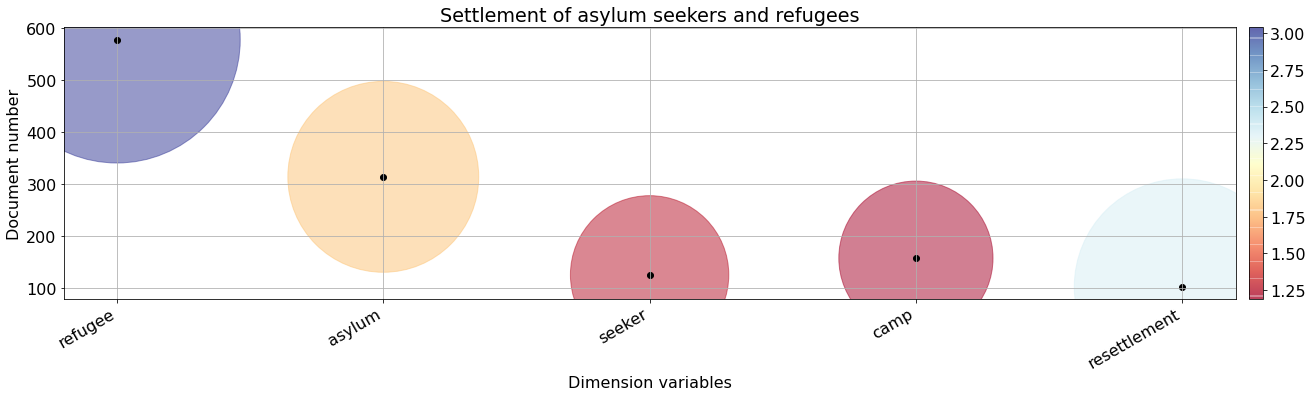

          Topic  Counts  Percentaje
0       refugee     577       10.85
1        asylum     314        5.90
3          camp     158        2.97
2        seeker     126        2.37
4  resettlement     103        1.94


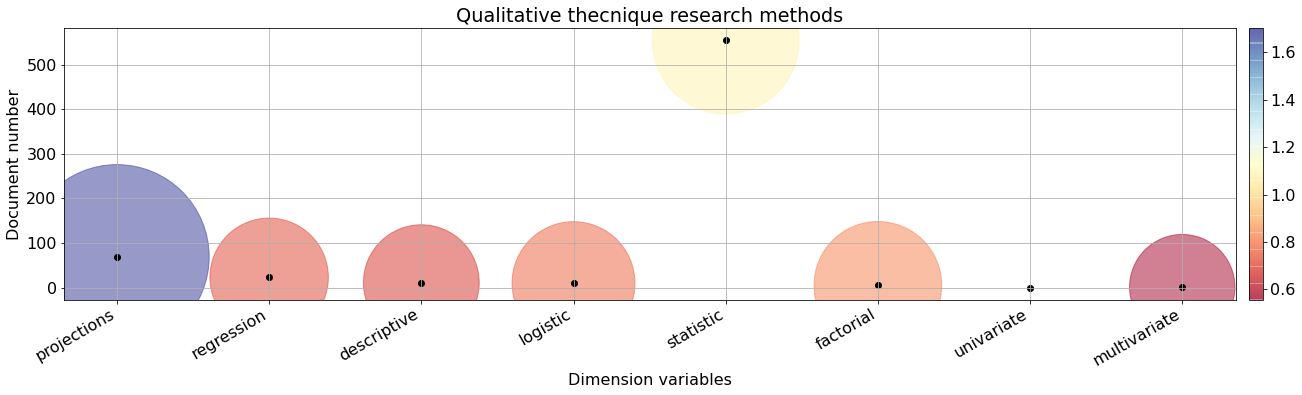

          Topic  Counts  Percentaje
4     statistic     554       10.42
0   projections      69        1.30
1    regression      23        0.43
2   descriptive      11        0.21
3      logistic      10        0.19
5     factorial       5        0.09
7  multivariate       1        0.02
6    univariate       0        0.00


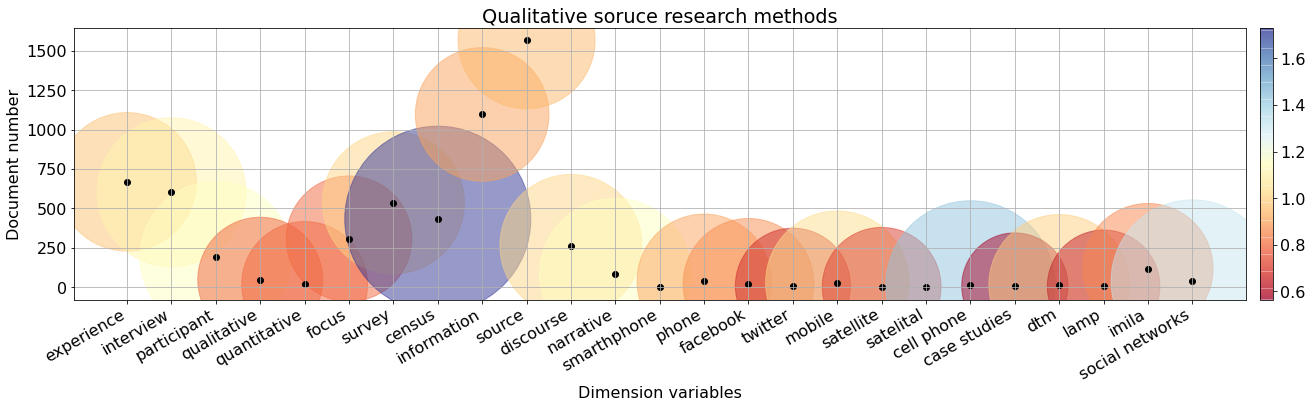

              Topic  Counts  Percentaje
9            source    1568       29.48
8       information    1097       20.62
0        experience     669       12.58
1         interview     603       11.34
6            survey     536       10.08
7            census     432        8.12
5             focus     308        5.79
10        discourse     265        4.98
2       participant     192        3.61
23            imila     119        2.24
11        narrative      83        1.56
3       qualitative      48        0.90
13            phone      39        0.73
24  social networks      39        0.73
16           mobile      30        0.56
14         facebook      22        0.41
4      quantitative      18        0.34
21              dtm      15        0.28
19       cell phone      12        0.23
15          twitter      10        0.19
20     case studies       8        0.15
22             lamp       6        0.11
17        satellite       3        0.06
18        satelital       0        0.00


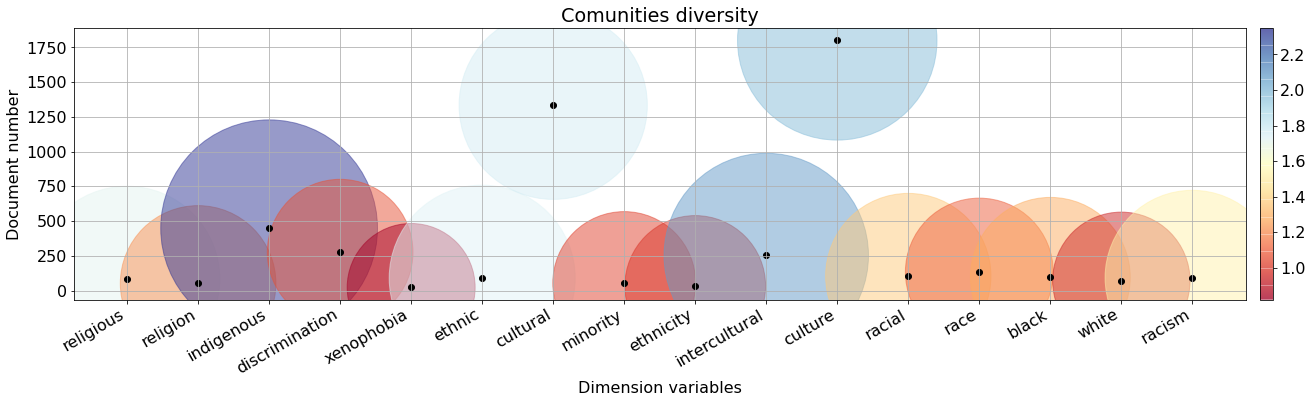

             Topic  Counts  Percentaje
10         culture    1800       33.84
6         cultural    1333       25.06
2       indigenous     448        8.42
3   discrimination     276        5.19
9    intercultural     252        4.74
12            race     133        2.50
11          racial     104        1.96
13           black      95        1.79
15          racism      93        1.75
5           ethnic      89        1.67
0        religious      83        1.56
14           white      70        1.32
7         minority      54        1.02
1         religion      51        0.96
8        ethnicity      33        0.62
4       xenophobia      22        0.41


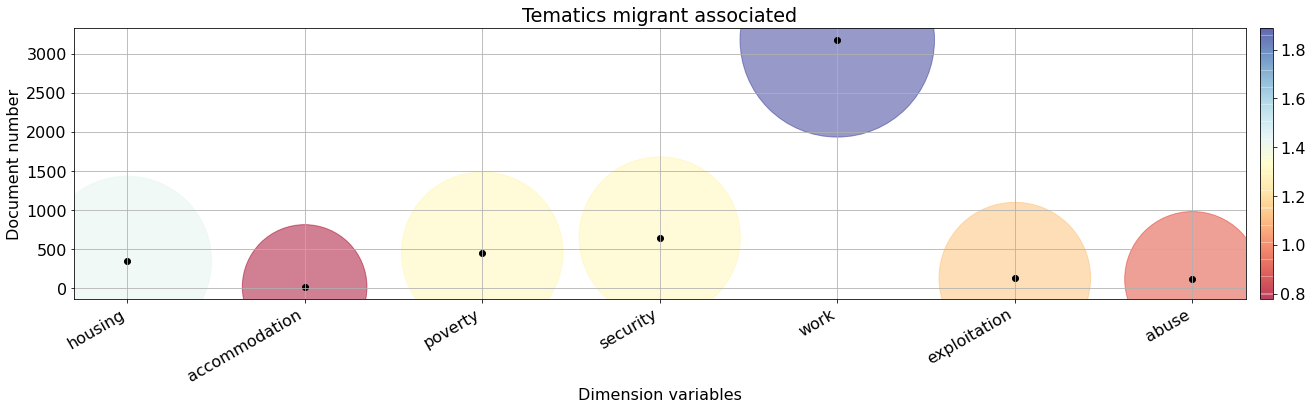

           Topic  Counts  Percentaje
4           work    3175       59.69
3       security     648       12.18
2        poverty     452        8.50
0        housing     352        6.62
5   exploitation     129        2.43
6          abuse     115        2.16
1  accommodation      16        0.30


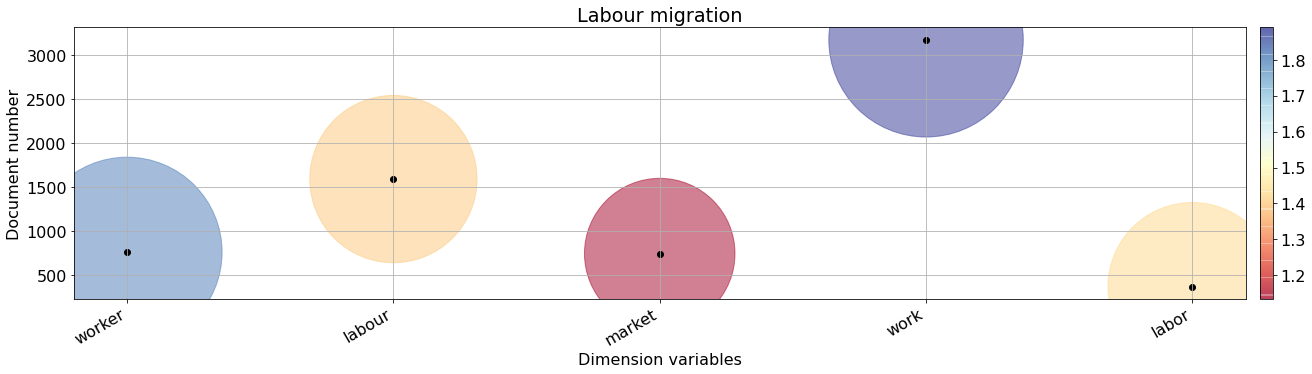

    Topic  Counts  Percentaje
3    work    3175       59.69
1  labour    1590       29.89
0  worker     758       14.25
2  market     742       13.95
4   labor     363        6.82


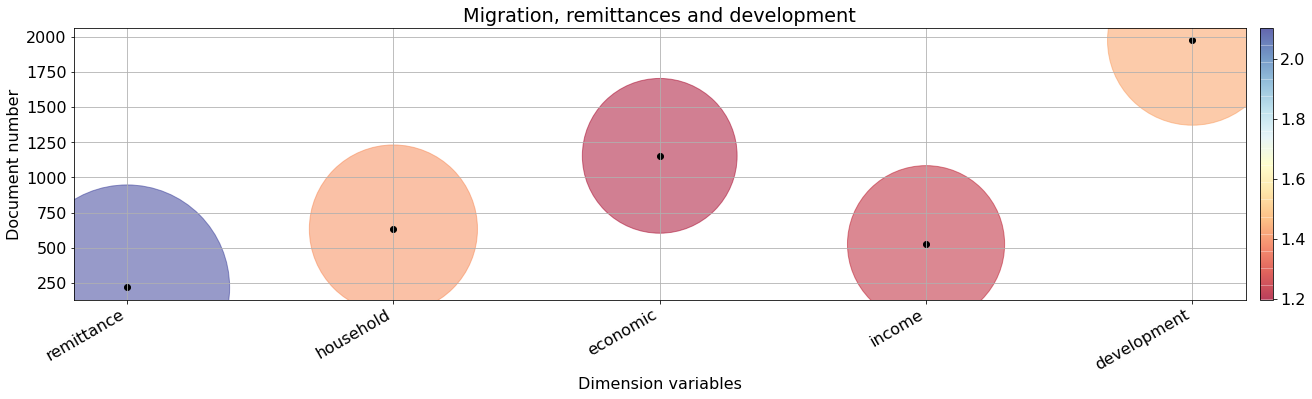

         Topic  Counts  Percentaje
4  development    1976       37.15
2     economic    1154       21.70
1    household     633       11.90
3       income     525        9.87
0   remittance     217        4.08


In [27]:
for i,j in zip([e1,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17],[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]):
    count_by_crit(data_all,i,lab=j,TH=0.5,plot=True,table=True,den=True)